In [1]:
import tensorflow as tf
from tensorflow import keras
import edgeimpulse as ei
physical_devices = tf.config.list_physical_devices('GPU')

if len(physical_devices) > 0:
    print("TensorFlow está utilizando la GPU.")
else:
    print("TensorFlow no está utilizando la GPU.")

TensorFlow está utilizando la GPU.


In [2]:
# import os
# import cv2
# import matplotlib.pyplot as plt

# def read_yolo_labels(label_file, image_size):
#     """
#     Lee las etiquetas en formato YOLO de un archivo.
#     Args:
#     - label_file: Ruta al archivo de etiquetas.
#     - image_size: Dimensiones de la imagen original (width, height).

#     Returns:
#     - boxes: Lista de bounding boxes [(x_min, y_min, width, height)].
#     - classes: Lista de clases correspondientes a cada bounding box.
#     """
#     boxes = []
#     classes = []
#     with open(label_file, 'r') as f:
#         for line in f:
#             values = line.strip().split()
#             cls = int(values[0])  # Clase
#             x_center, y_center, box_width, box_height = map(float, values[1:])
            
#             # Convertir coordenadas de YOLO (normalizadas) a píxeles
#             img_width, img_height = image_size
#             x_min = int((x_center - box_width / 2) * img_width)
#             y_min = int((y_center - box_height / 2) * img_height)
#             width = int(box_width * img_width)
#             height = int(box_height * img_height)
            
#             boxes.append([x_min, y_min, width, height])
#             classes.append(cls)
#     return boxes, classes

# def plot_images_with_yolo_bboxes(images_dir, labels_dir, num_images=50):
#     """
#     Visualiza imágenes con bounding boxes en formato YOLO.
#     Args:
#     - images_dir: Directorio de las imágenes.
#     - labels_dir: Directorio de las etiquetas.
#     - num_images: Número máximo de imágenes a visualizar.
#     """
#     image_files = [f for f in os.listdir(images_dir) if f.endswith(('.jpg', '.png'))]
    
#     for idx, image_file in enumerate(image_files[:num_images]):
#         image_path = os.path.join(images_dir, image_file)
#         label_path = os.path.join(labels_dir, os.path.splitext(image_file)[0] + ".txt")
        
#         # Cargar imagen
#         image = cv2.imread(image_path)
#         img_height, img_width = image.shape[:2]
        
#         # Leer etiquetas YOLO
#         if os.path.exists(label_path):
#             boxes, classes = read_yolo_labels(label_path, (img_width, img_height))
#         else:
#             boxes, classes = [], []
        
#         # Plotear imagen con bounding boxes
#         plt.figure(figsize=(8, 8))
#         plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
#         for box, cls in zip(boxes, classes):
#             x_min, y_min, width, height = box
#             rect = plt.Rectangle(
#                 (x_min, y_min), width, height, linewidth=2, edgecolor='r', facecolor='none'
#             )
#             plt.gca().add_patch(rect)
#             plt.text(
#                 x_min, y_min - 5, f"Class {cls}", color="red", fontsize=10, backgroundcolor="white"
#             )
#         plt.title(f"Imagen {idx + 1} con Bounding Boxes")
#         plt.axis("off")
#         plt.show()

# # Directorios del dataset
# train_images_dir = "data2/train/images"
# train_labels_dir = "data2/train/labels"

# # Graficar imágenes con bounding boxes
# plot_images_with_yolo_bboxes(train_images_dir, train_labels_dir, num_images=50)

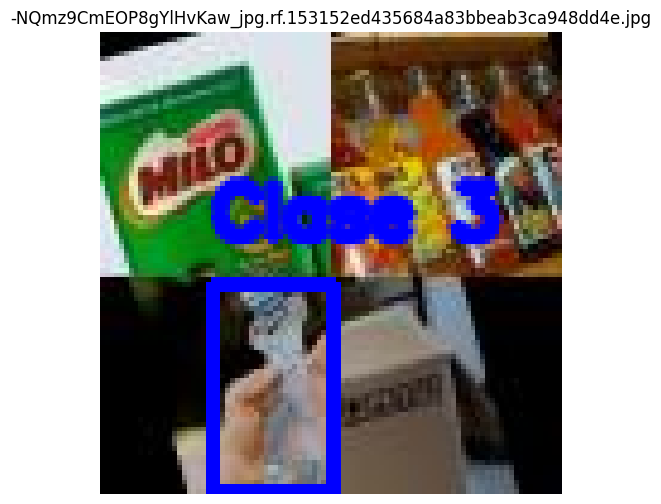

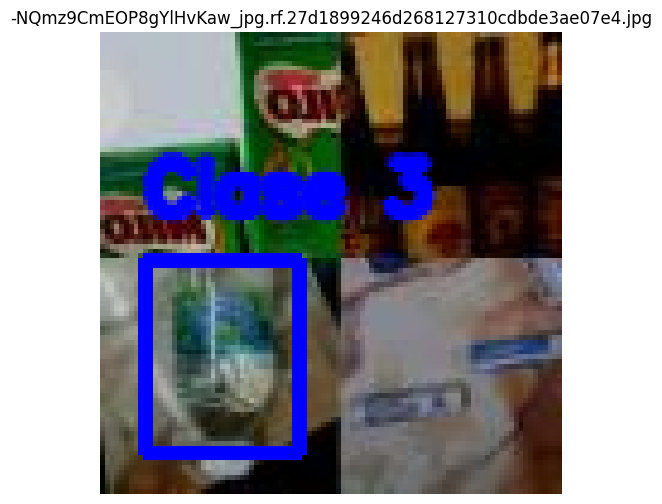

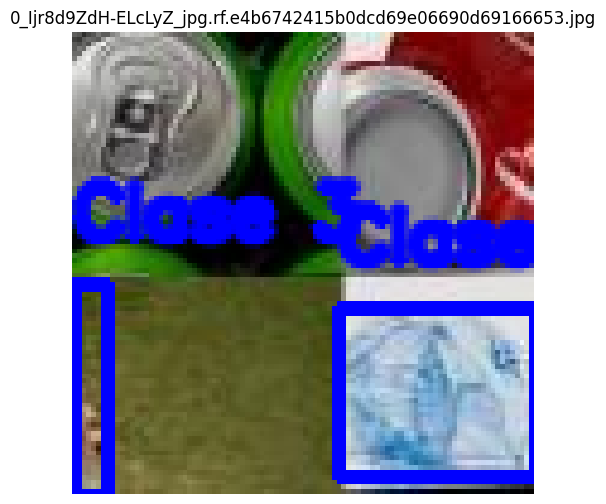

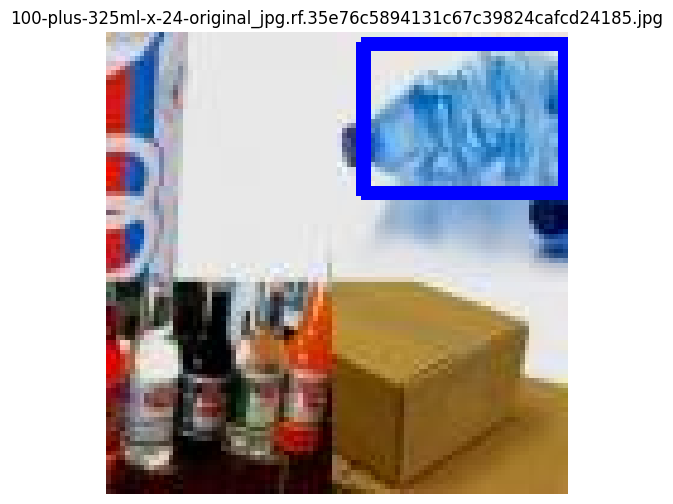

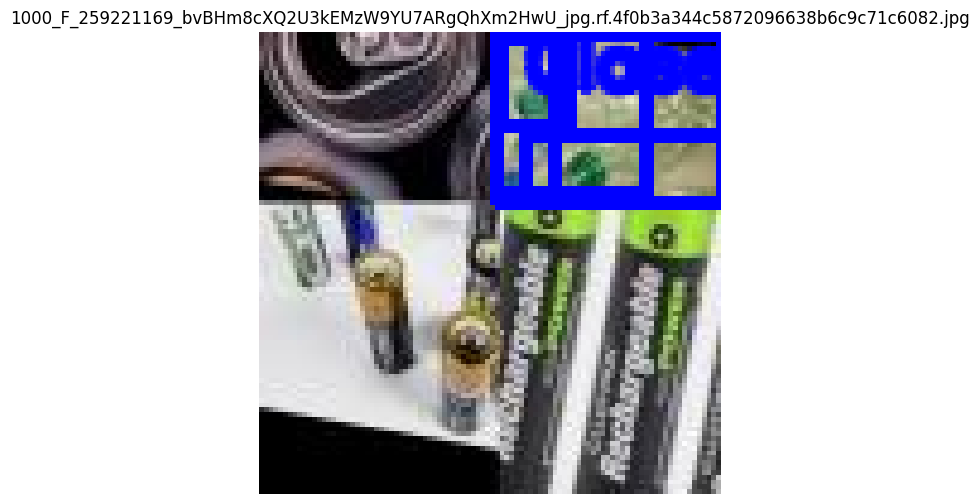

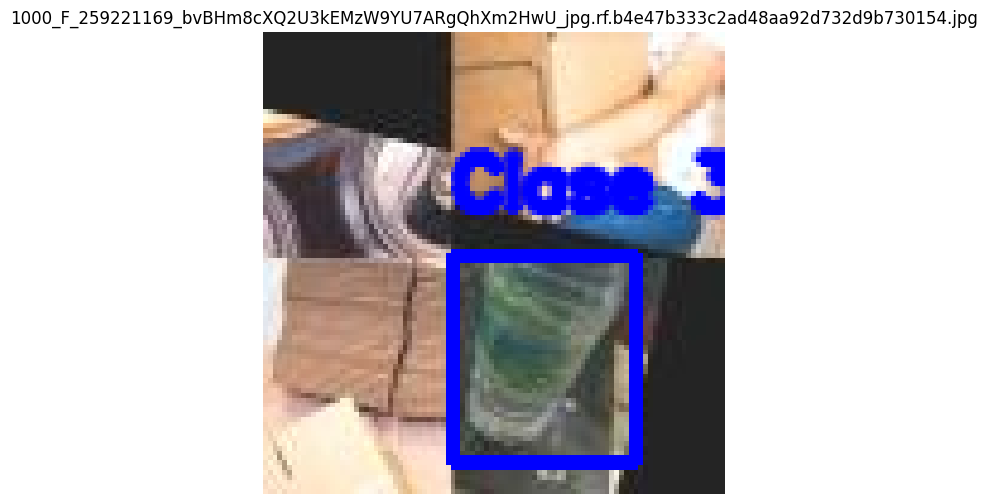

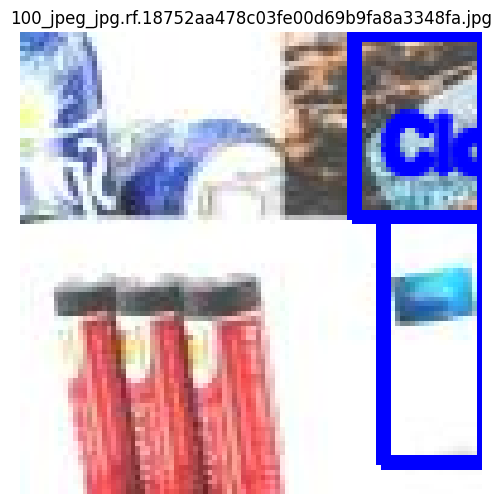

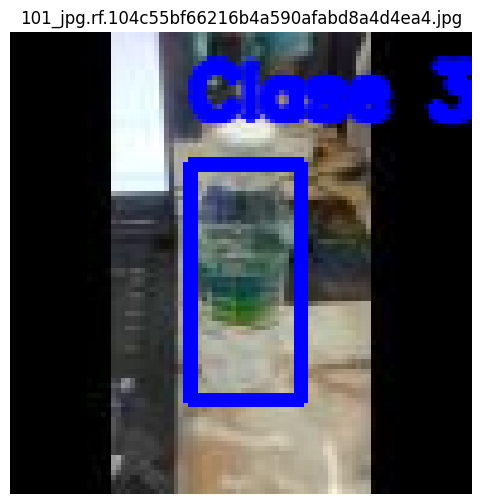

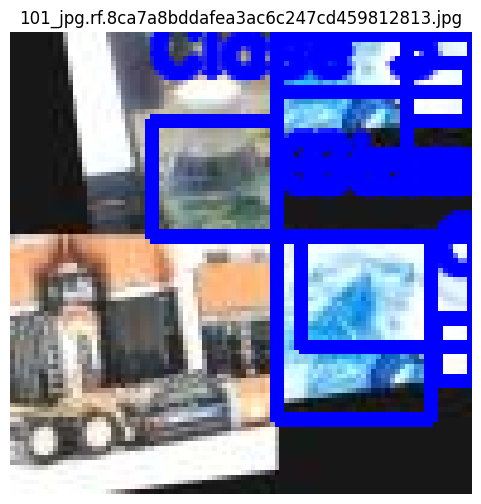

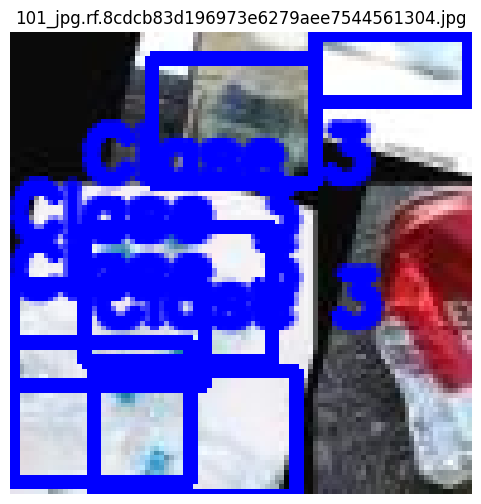

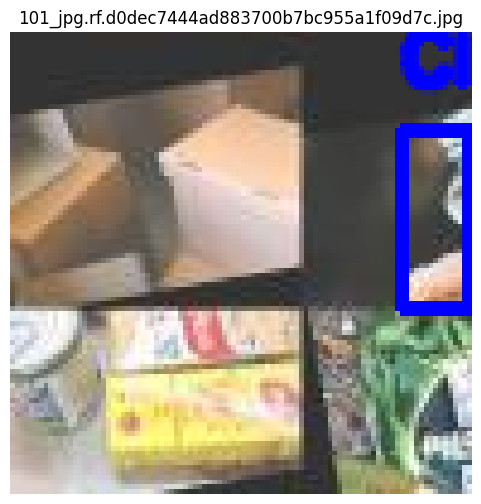

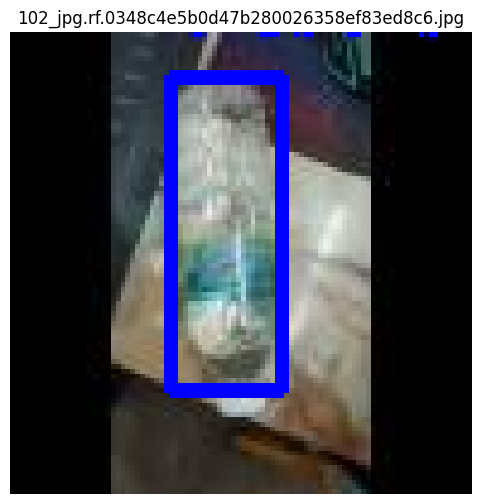

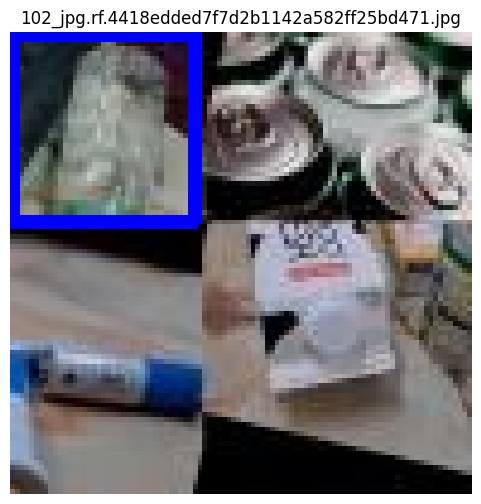

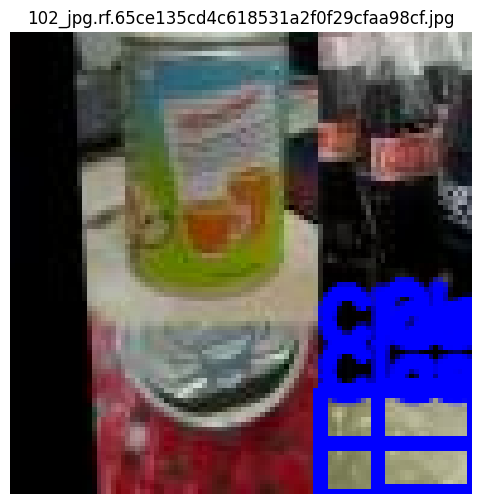

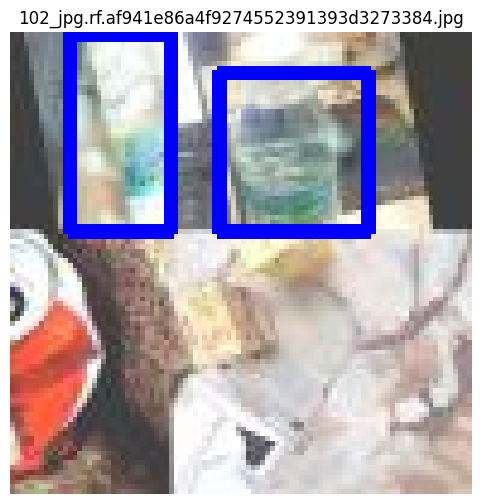

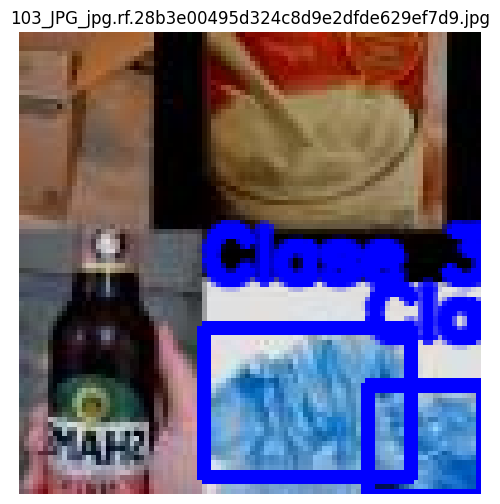

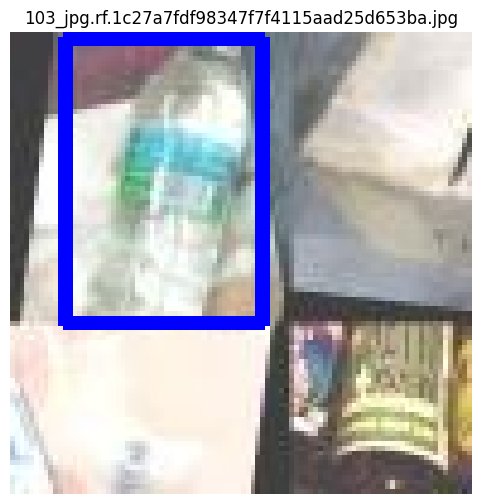

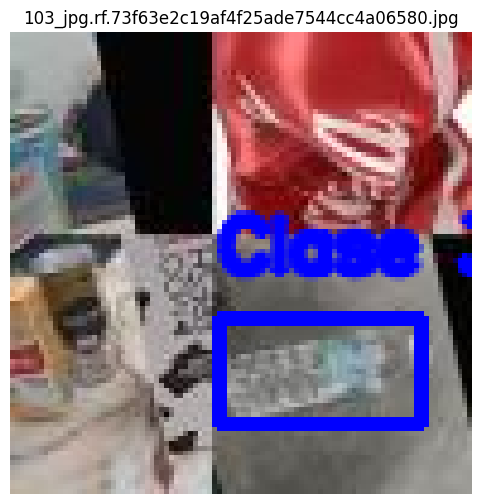

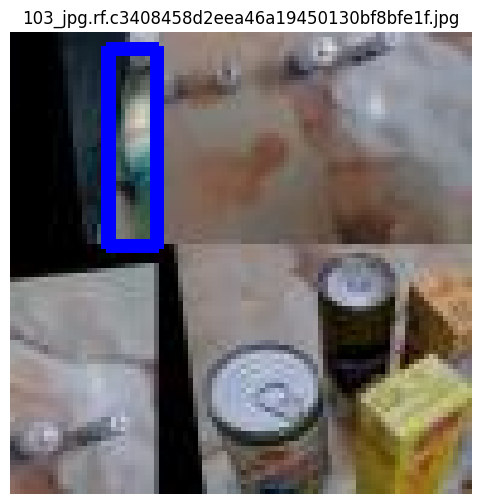

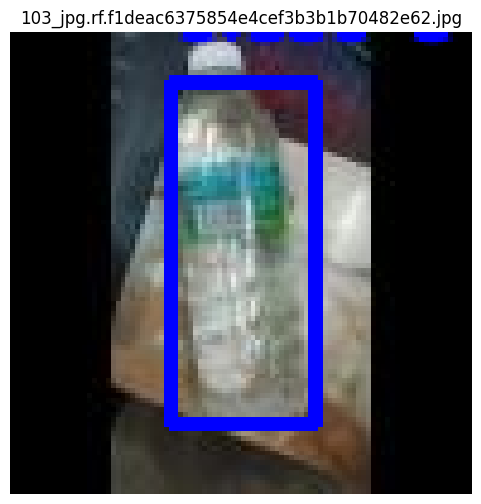

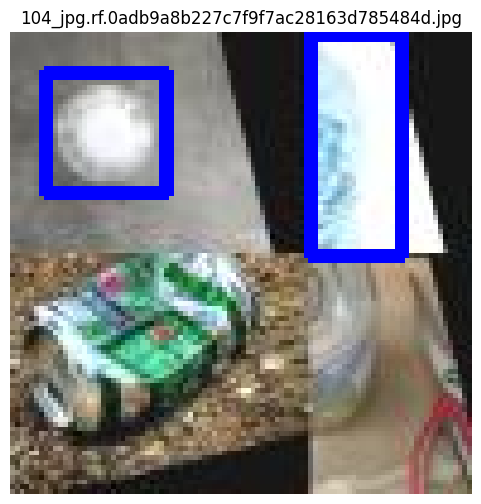

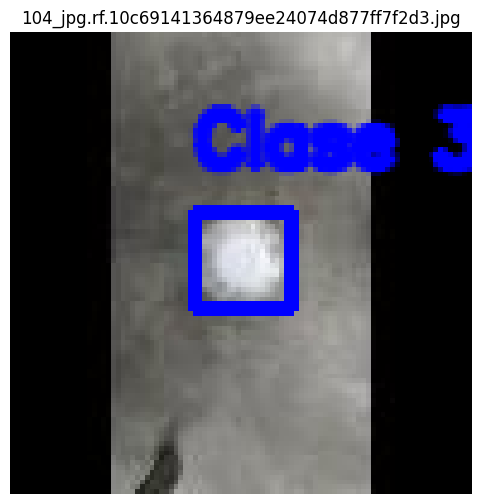

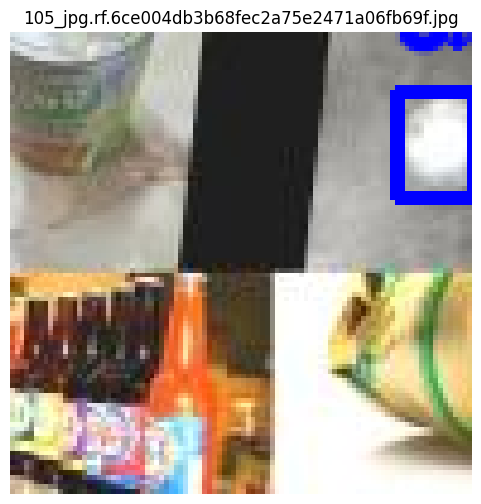

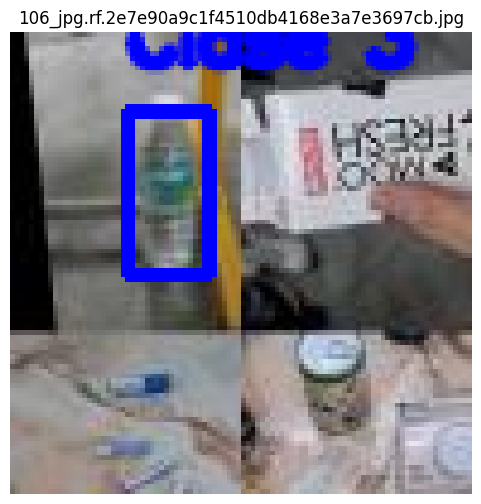

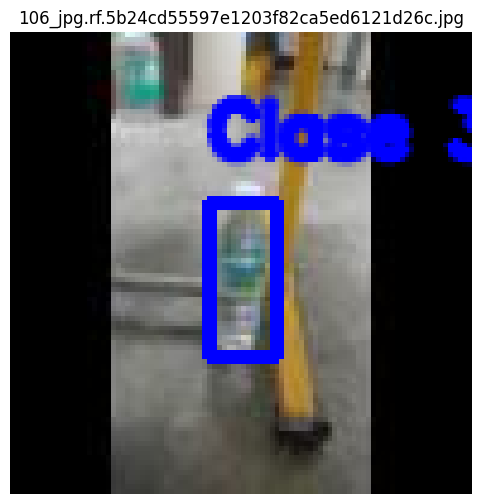

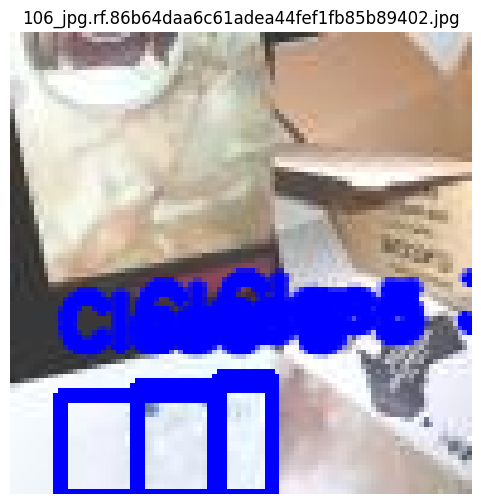

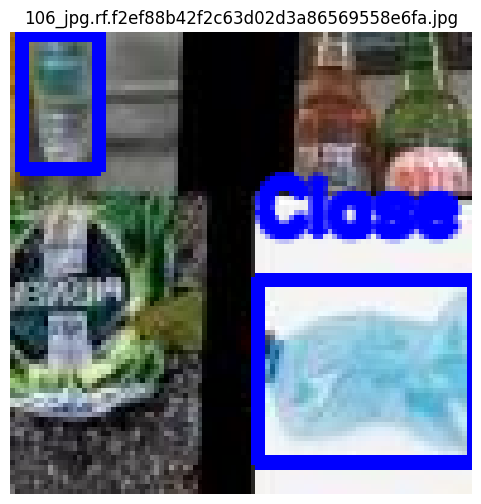

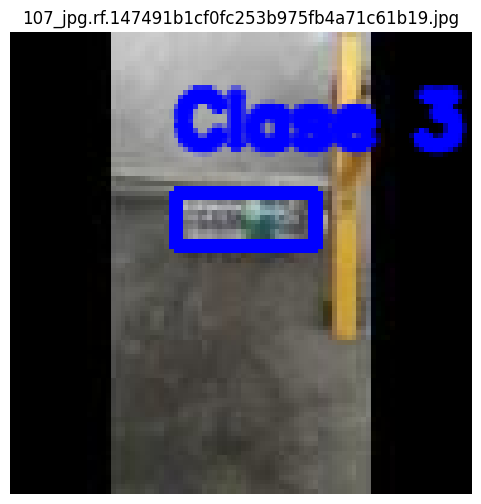

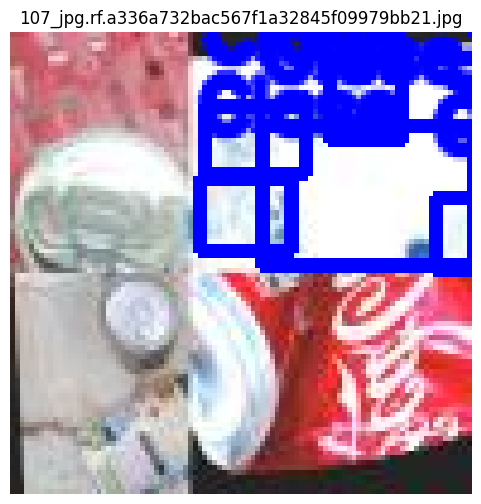

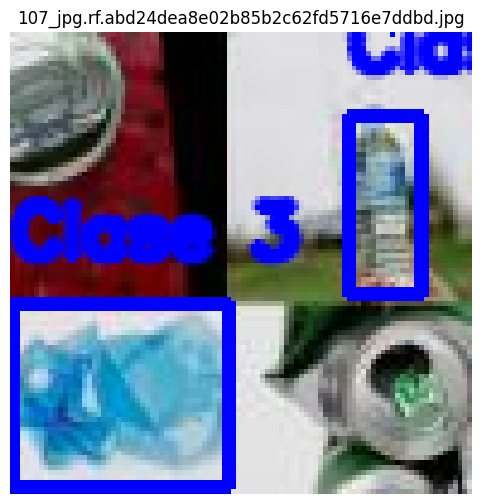

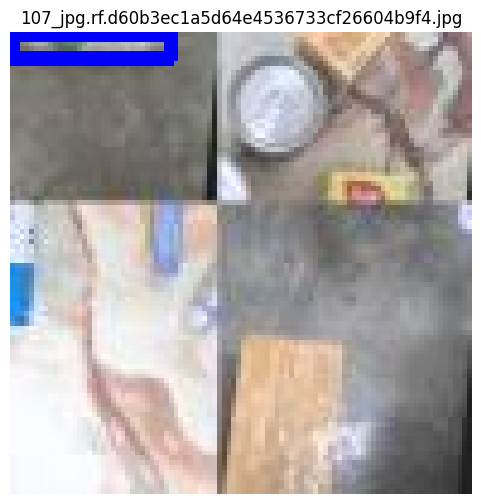

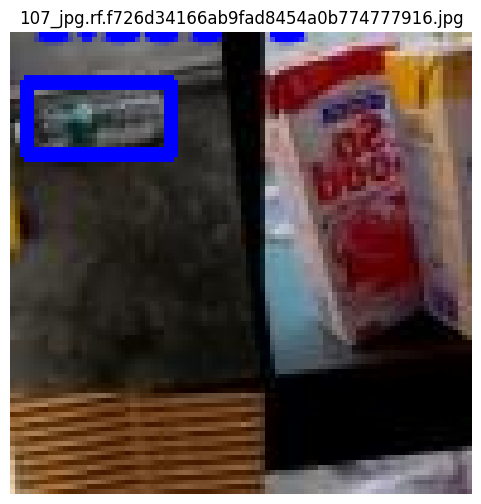

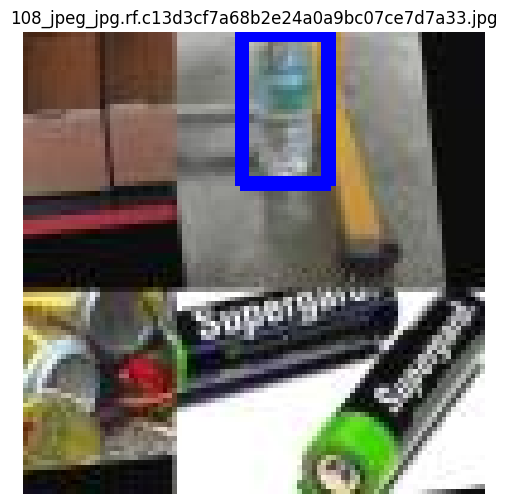

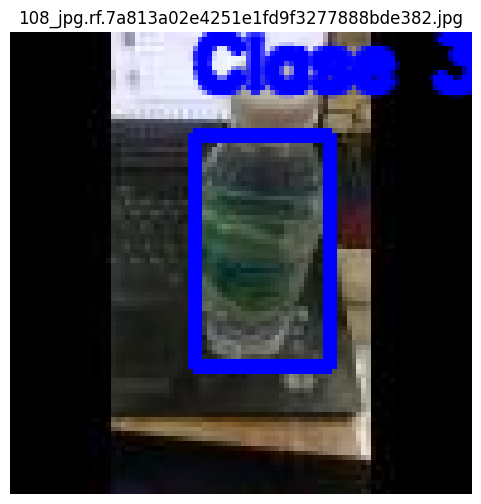

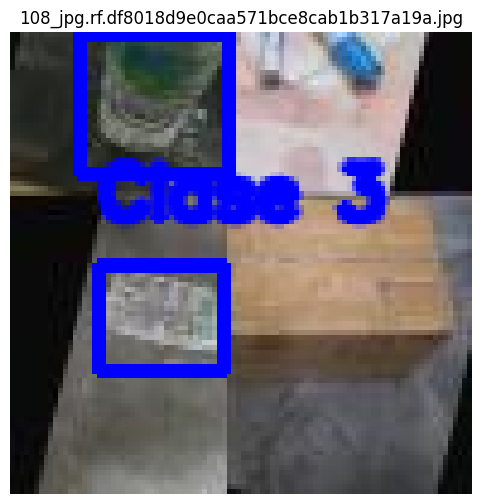

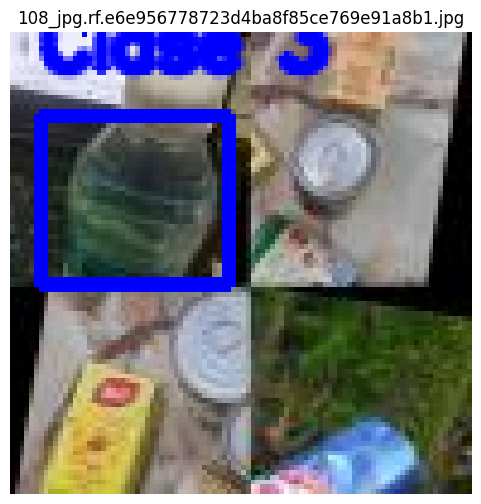

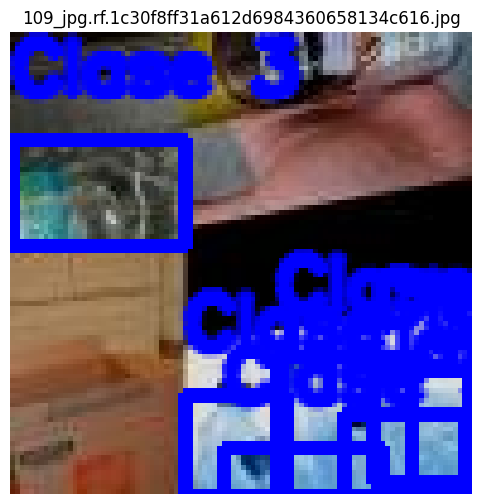

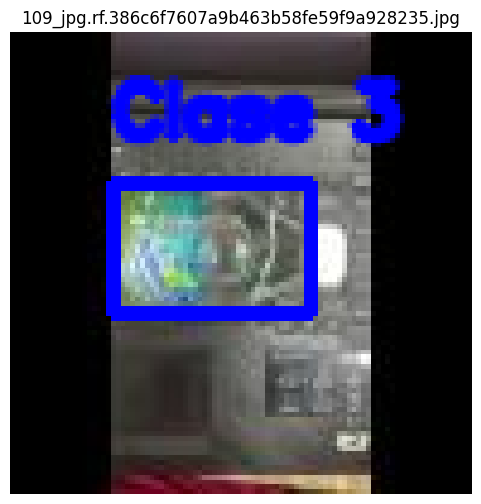

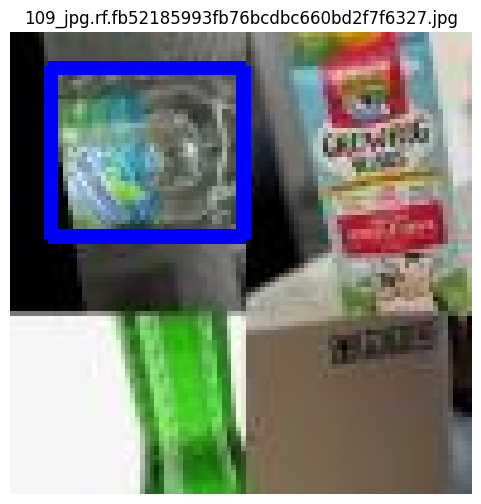

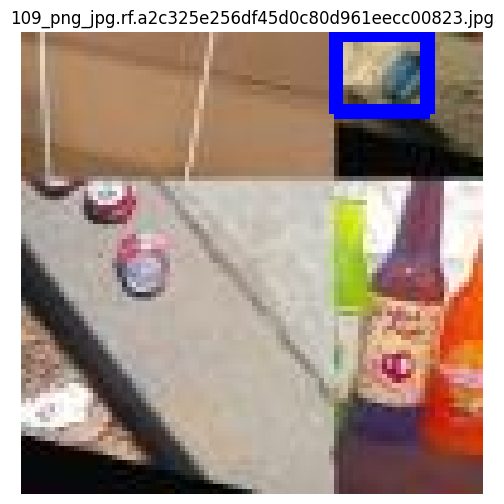

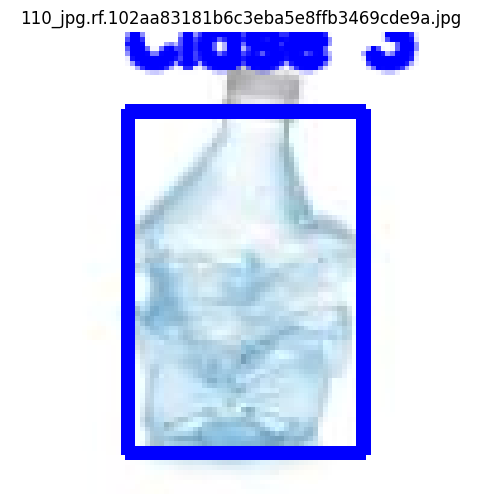

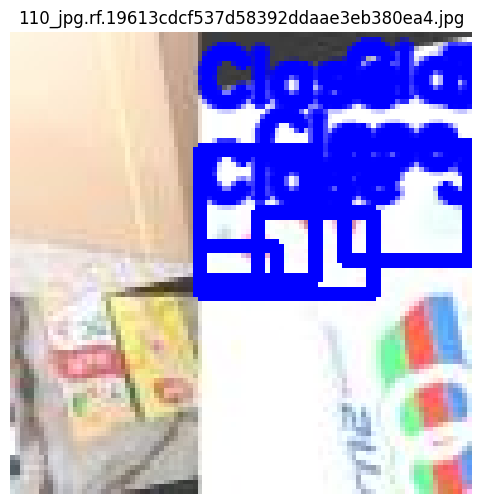

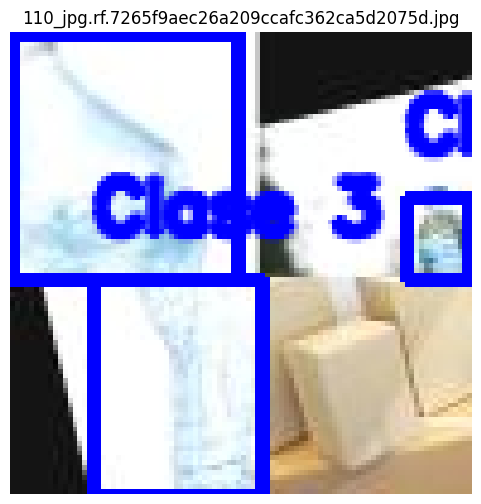

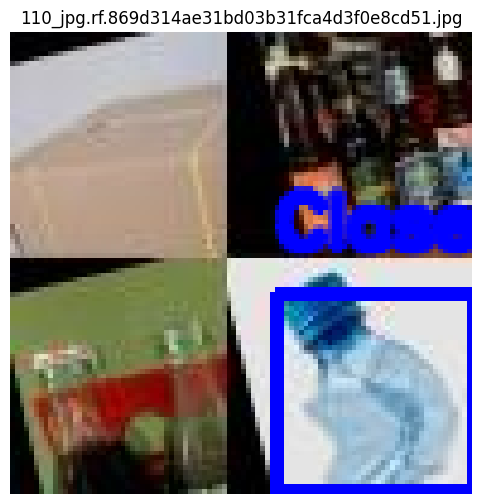

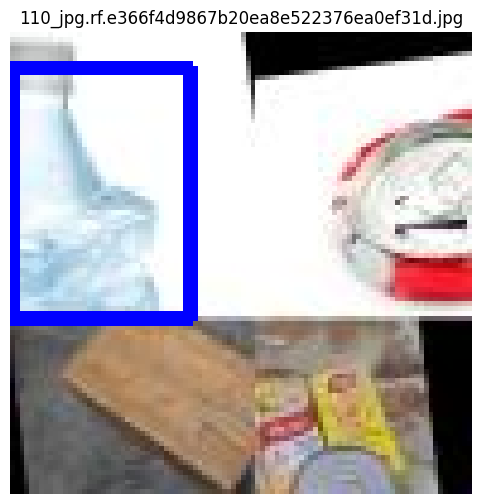

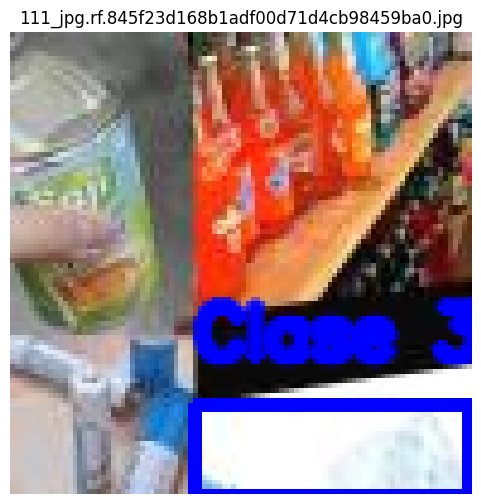

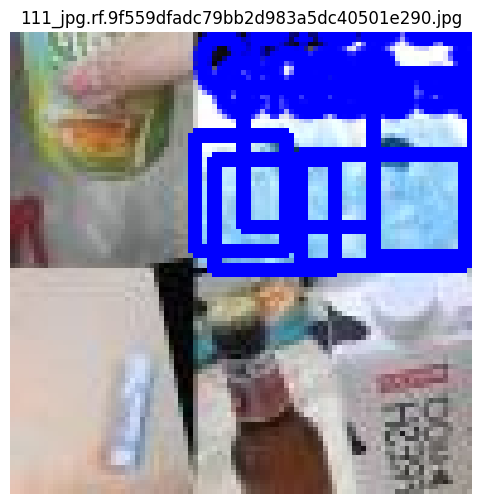

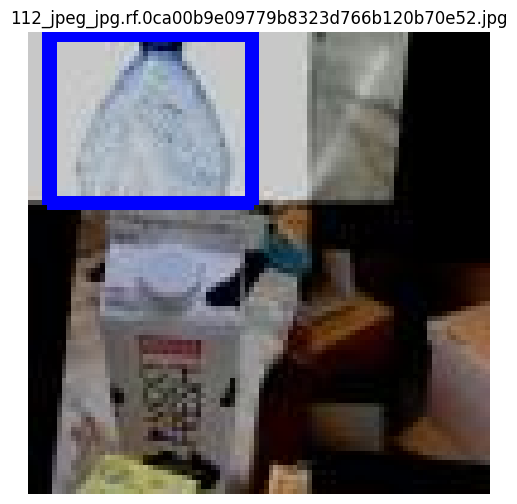

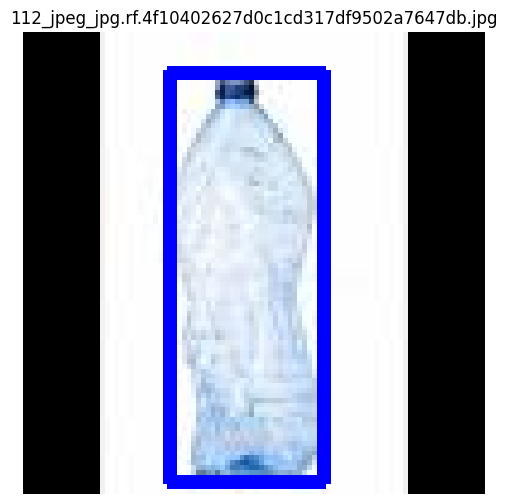

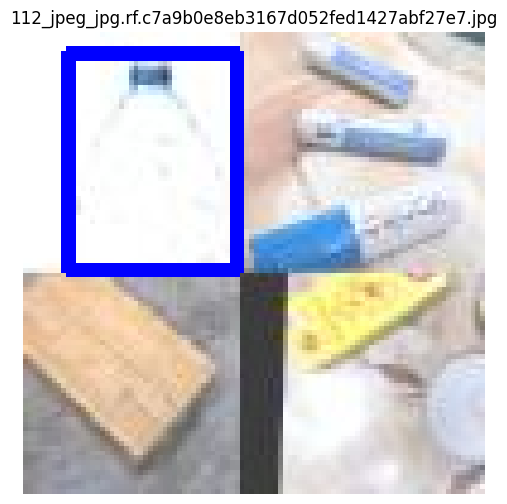

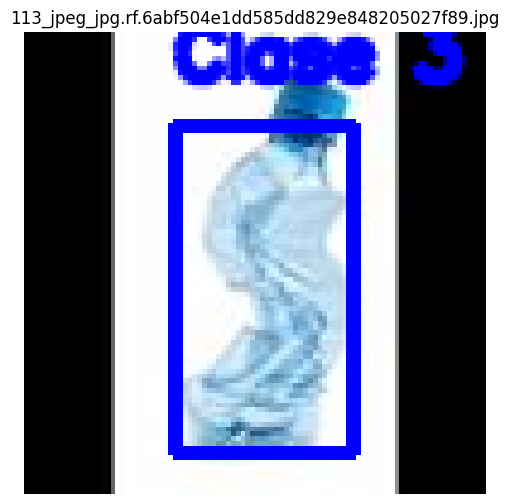

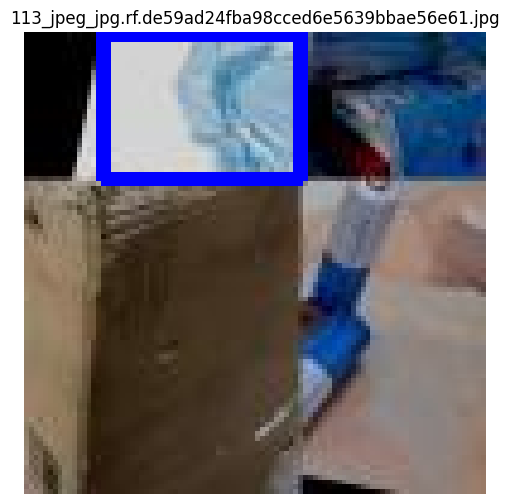

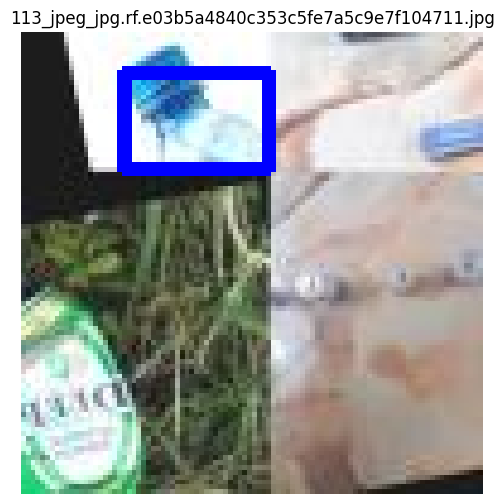

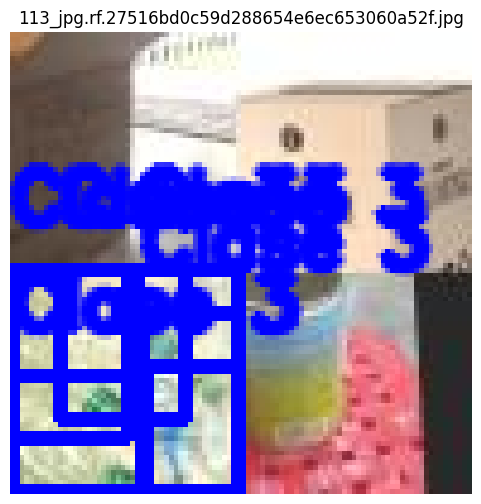

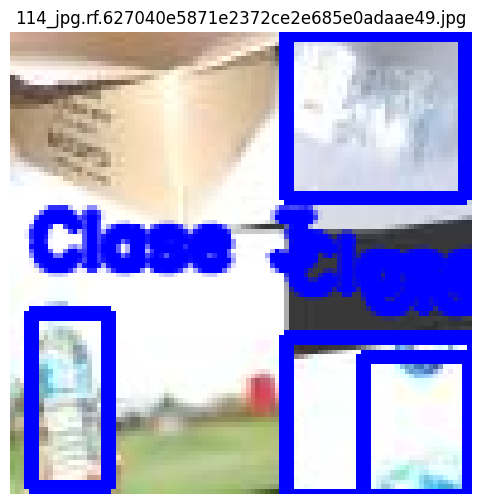

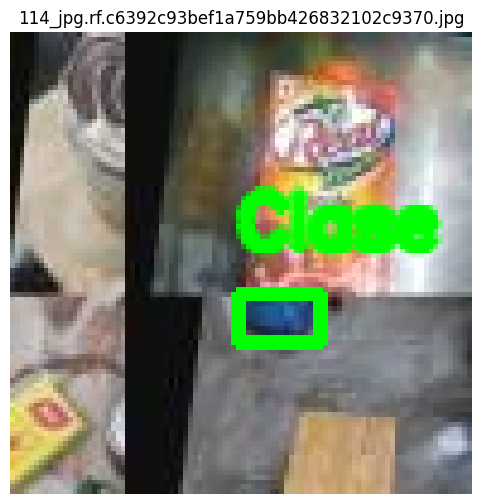

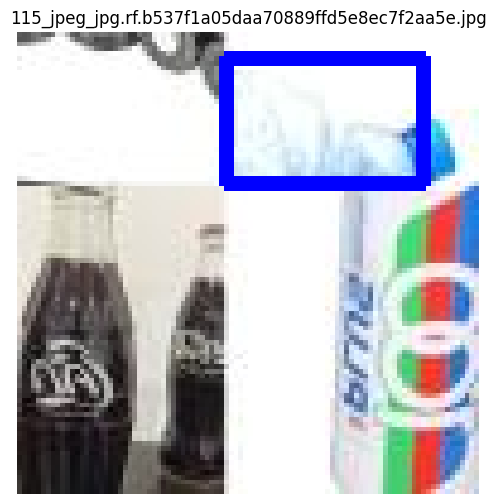

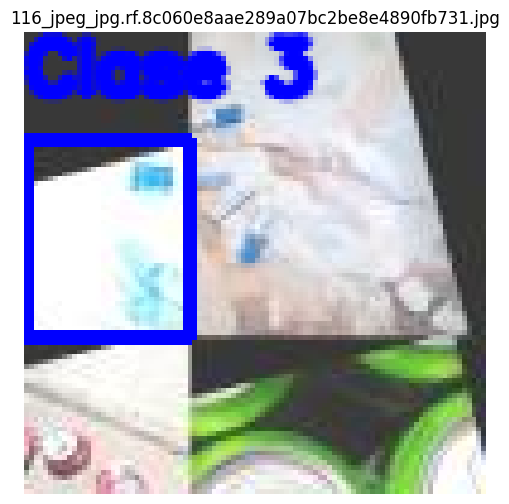

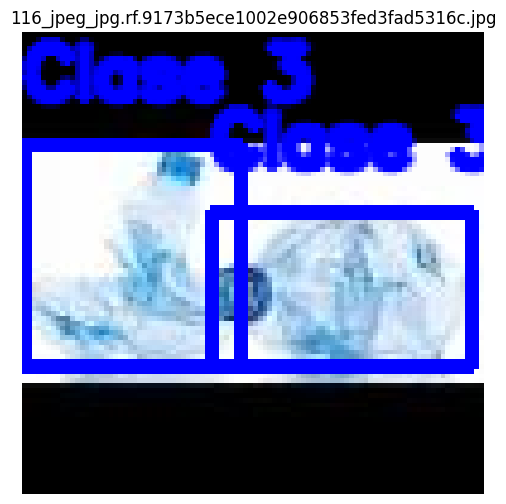

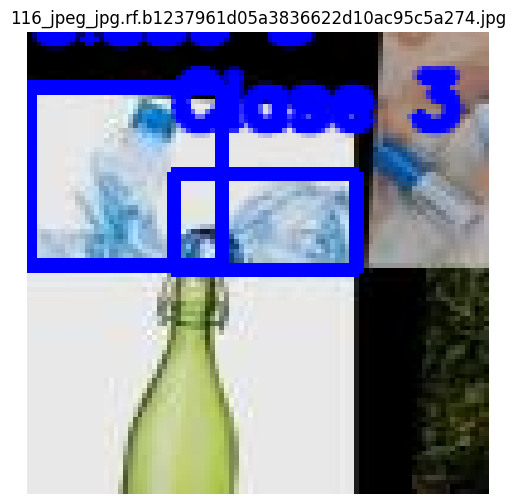

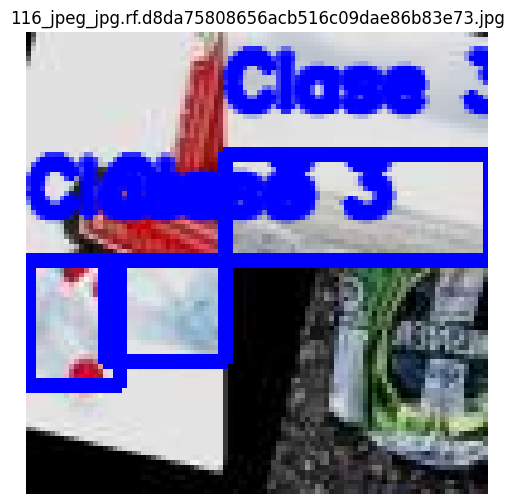

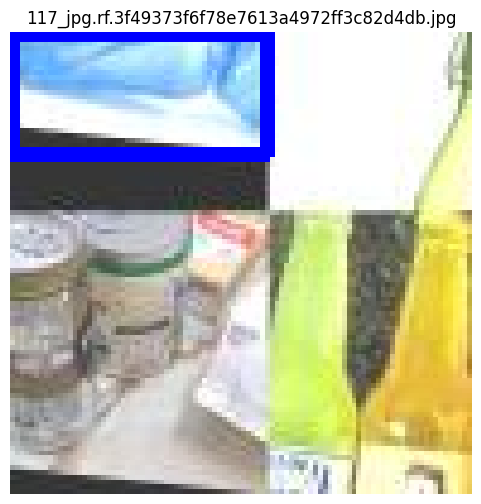

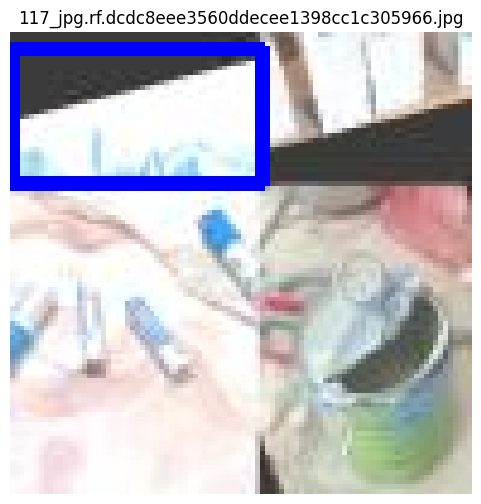

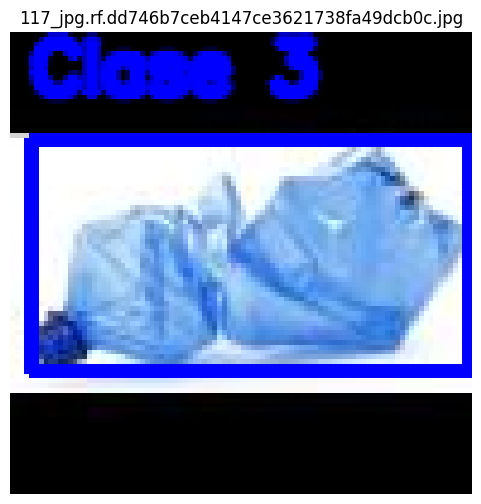

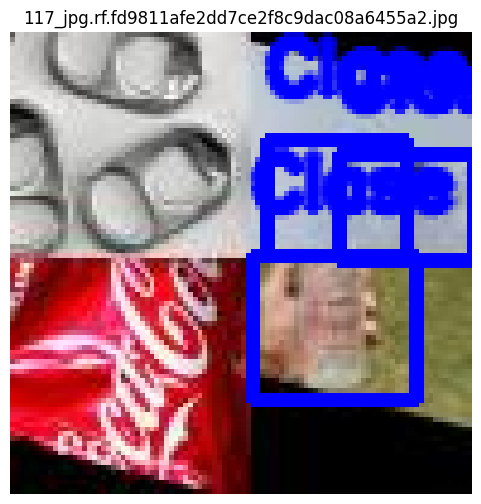

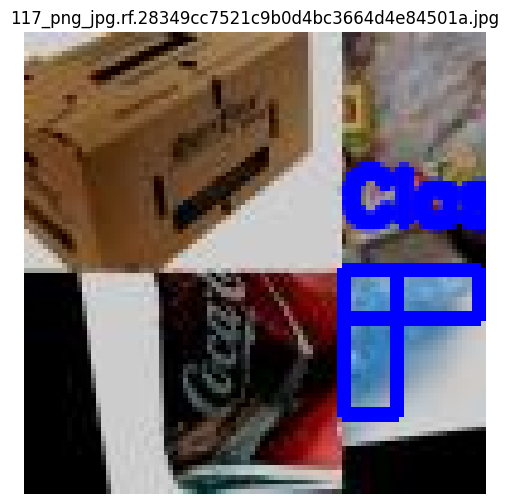

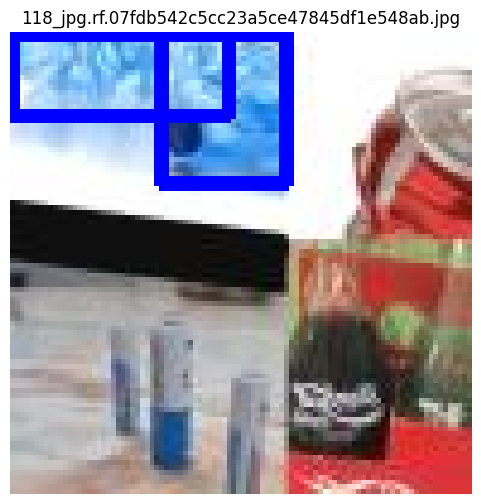

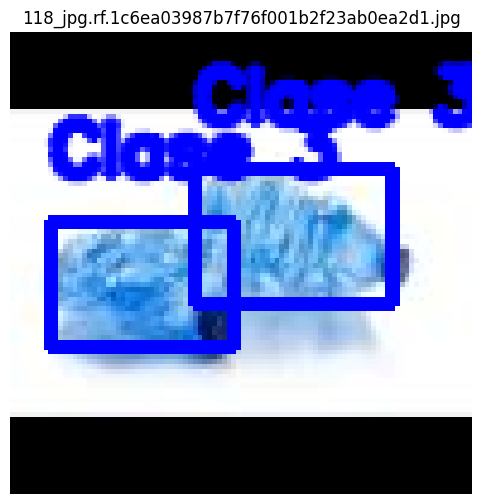

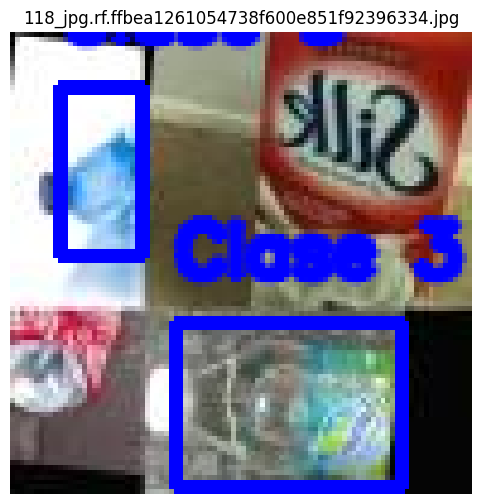

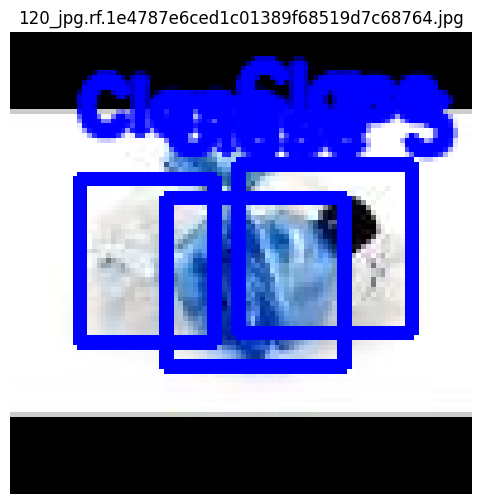

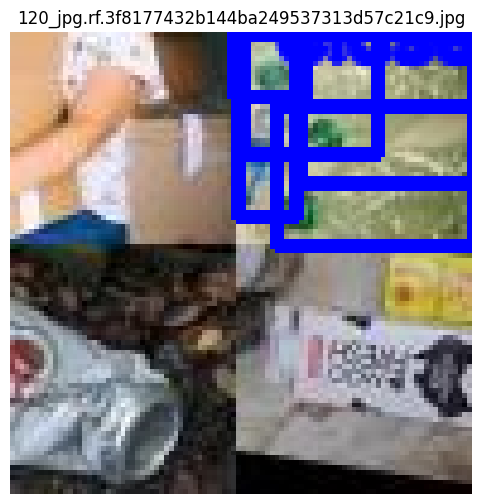

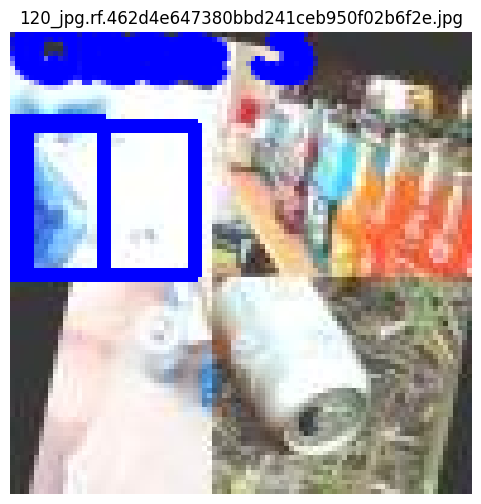

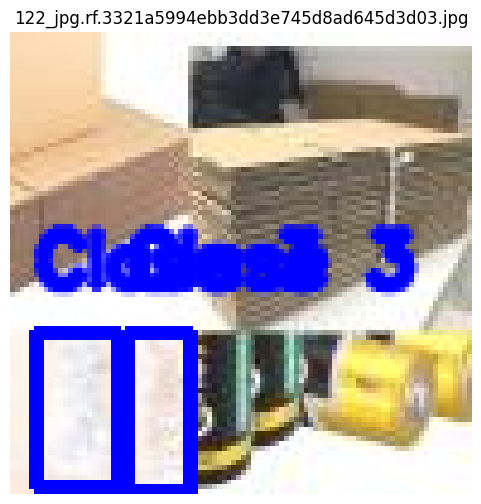

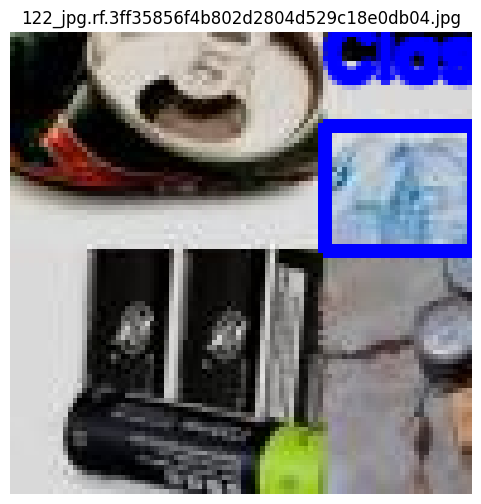

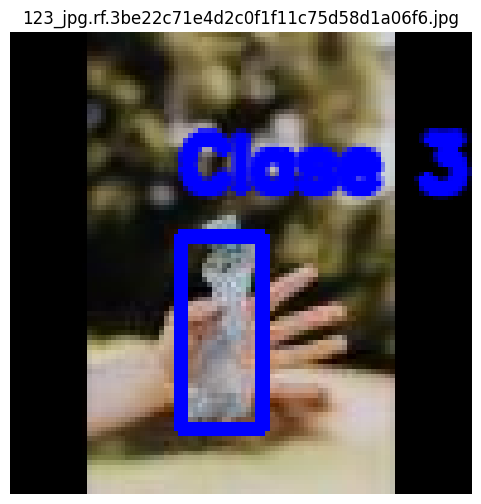

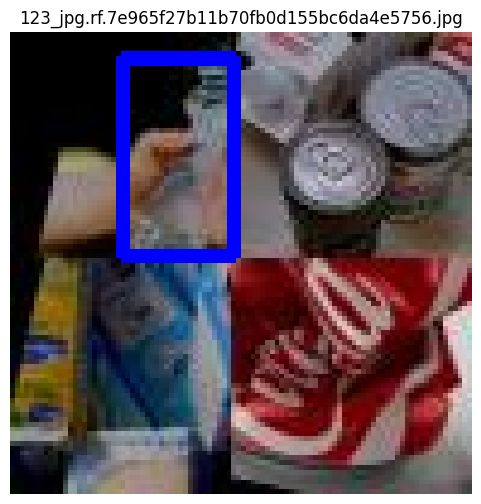

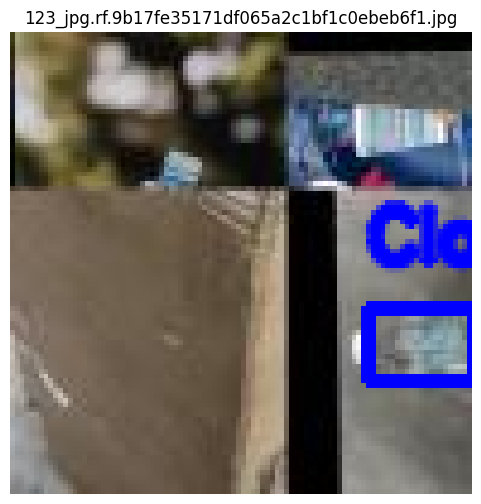

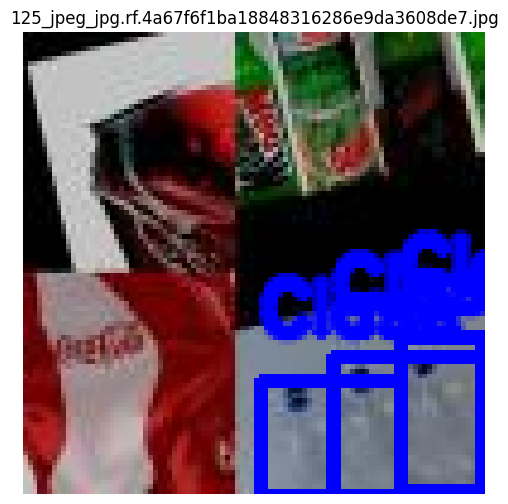

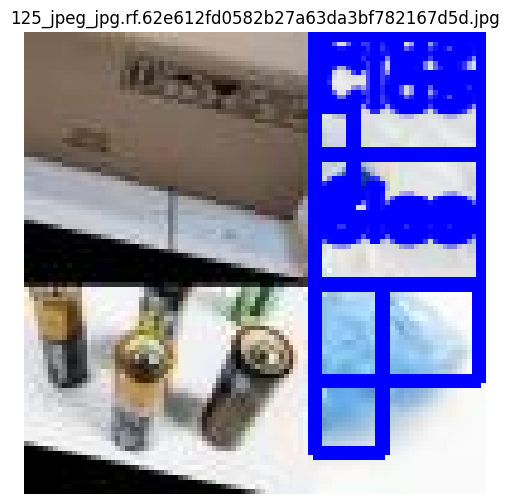

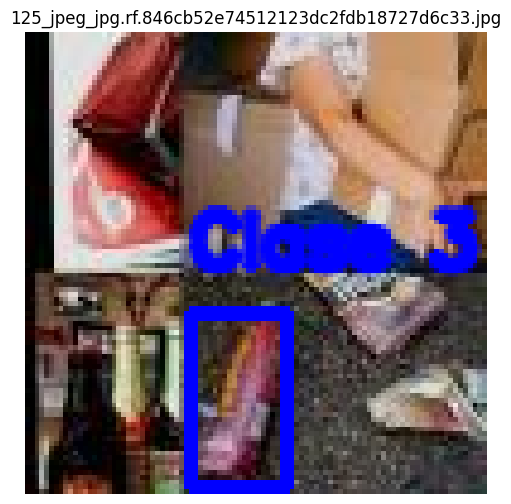

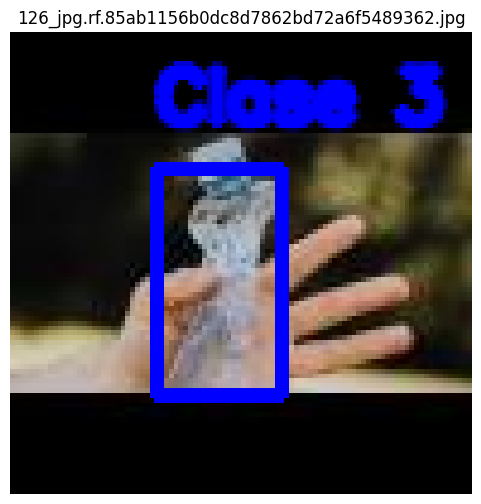

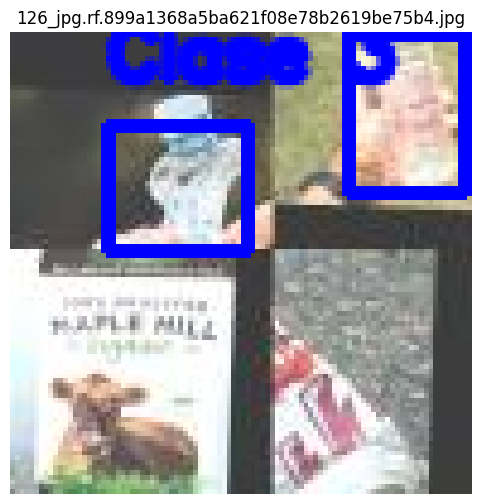

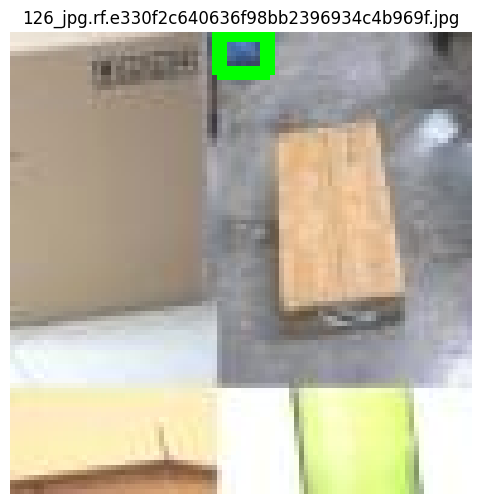

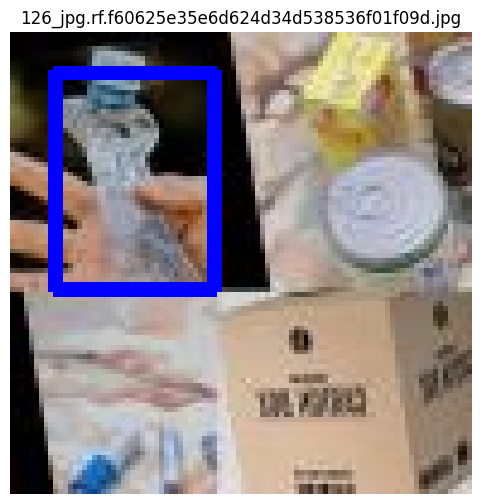

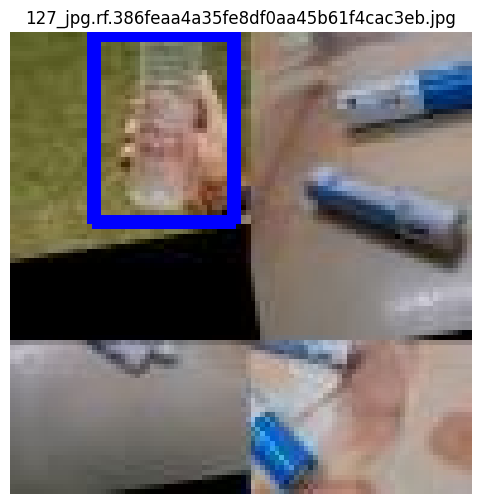

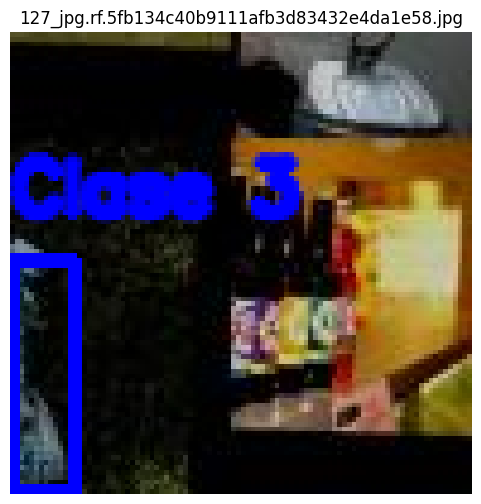

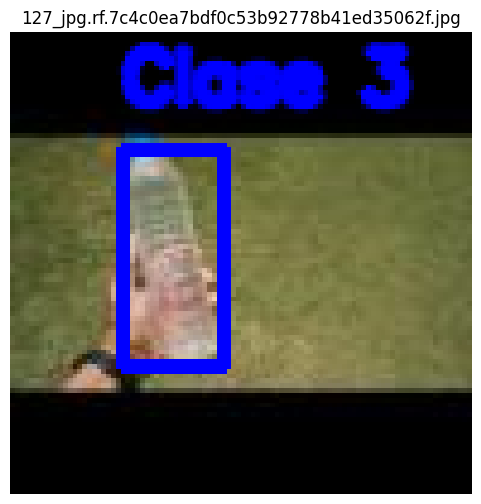

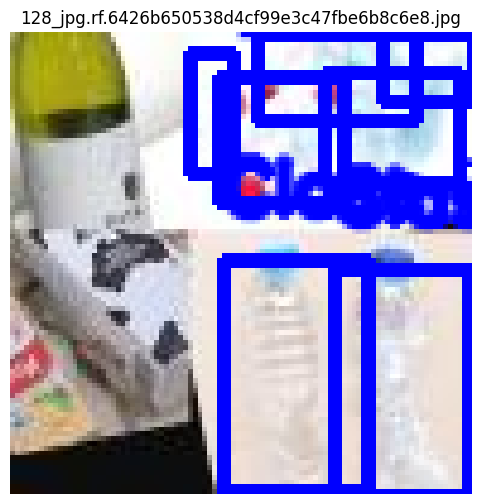

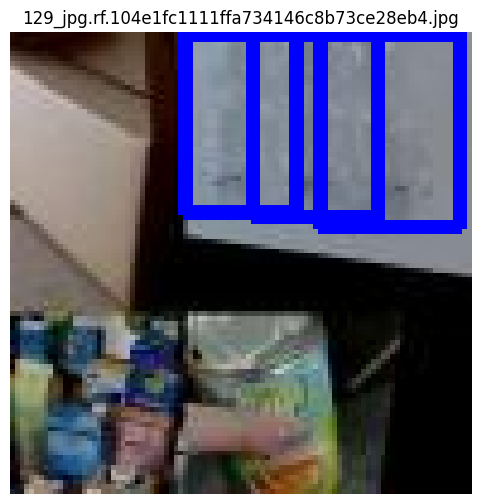

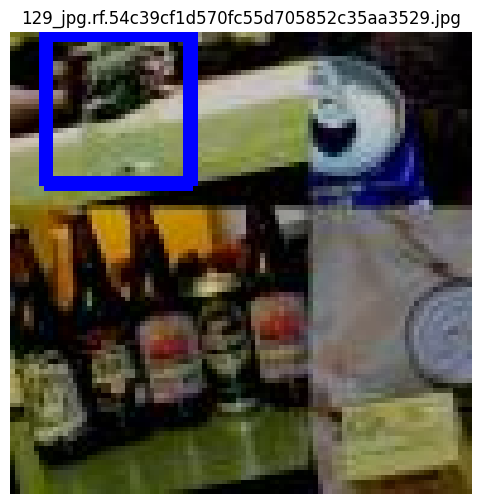

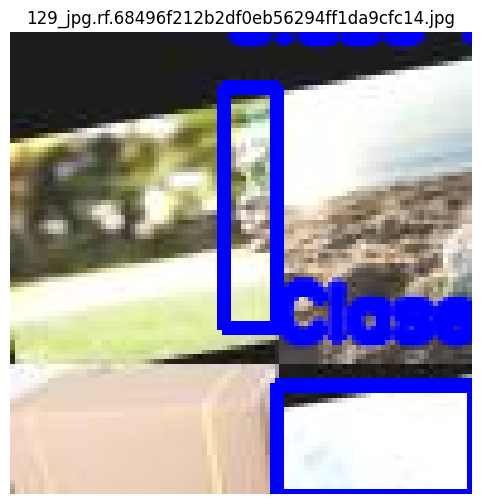

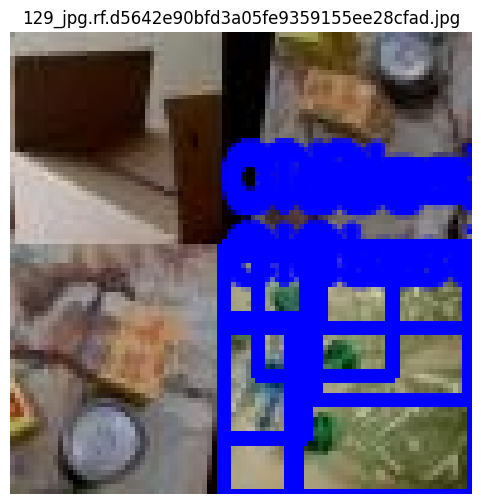

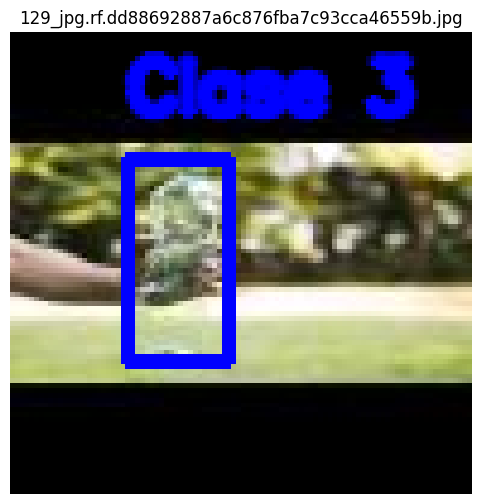

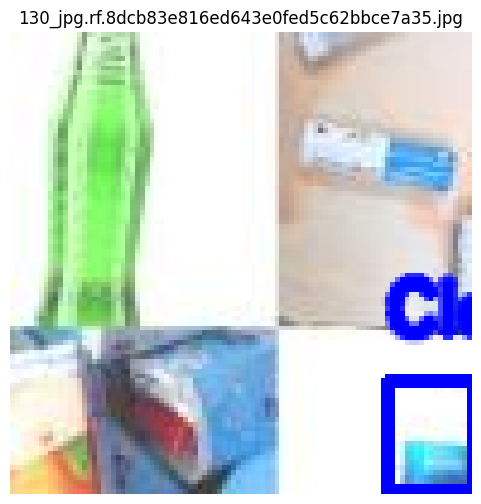

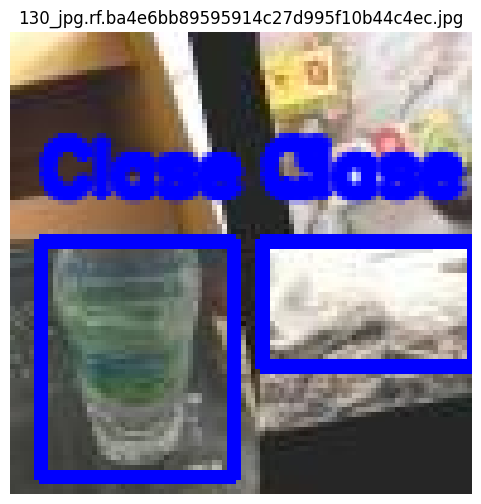

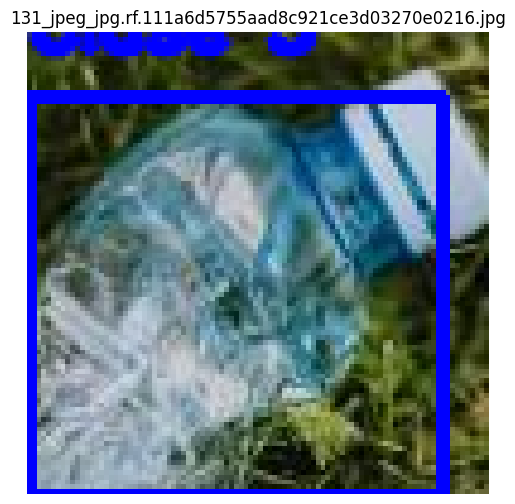

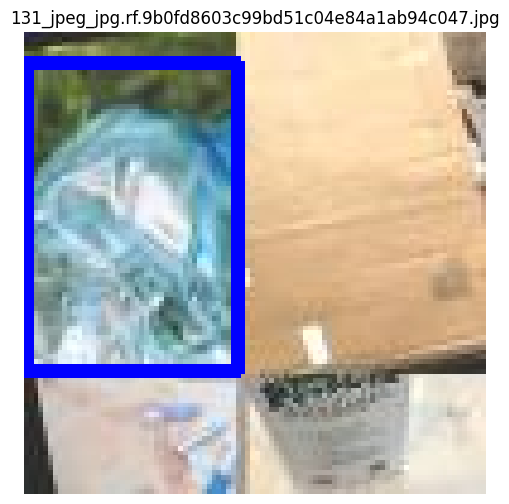

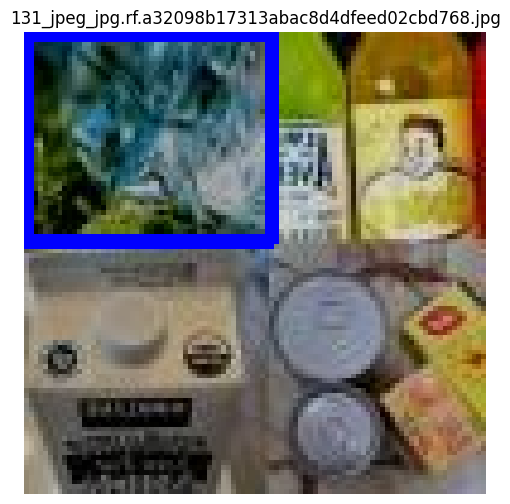

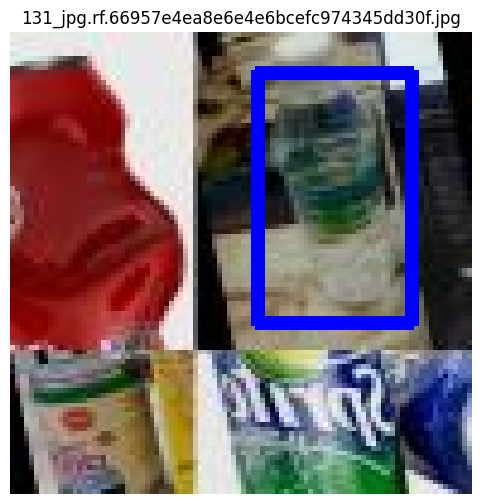

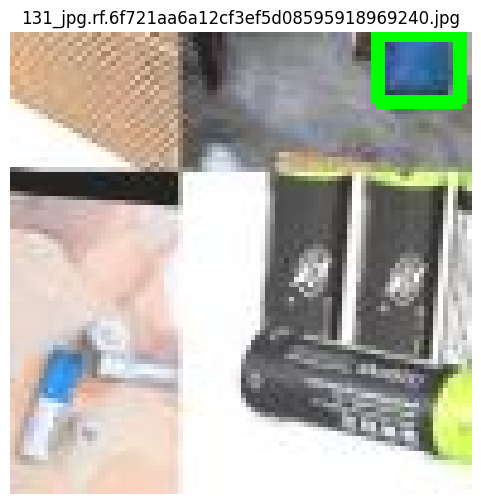

In [4]:
import os
import cv2
import matplotlib.pyplot as plt

# Directorios
train_images_dir = "data2/train/images"
train_labels_dir = "data2/train/labels"

# Clases
total_classes = 3
class_names = ["Clase 1", "Clase 2", "Clase 3"]

# Colores para cada clase
colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # RGB para cada clase

# Obtener listas de archivos
image_files = sorted(os.listdir(train_images_dir))[:100]  # Primeras 100 imágenes
label_files = [f.replace(".jpg", ".txt") for f in image_files]

for img_file, lbl_file in zip(image_files, label_files):
    # Leer imagen
    img_path = os.path.join(train_images_dir, img_file)
    label_path = os.path.join(train_labels_dir, lbl_file)
    
    image = cv2.imread(img_path)
    if image is None:
        print(f"No se pudo cargar la imagen: {img_path}")
        continue
    
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Leer labels
    if not os.path.exists(label_path):
        print(f"Etiqueta no encontrada para {img_file}")
        continue

    with open(label_path, 'r') as f:
        lines = f.readlines()

    # Dibujar bounding boxes
    h, w, _ = image.shape
    for line in lines:
        parts = line.strip().split()
        class_id = int(parts[0])
        cx, cy, bw, bh = map(float, parts[1:])

        # Coordenadas absolutas
        x1 = int((cx - bw / 2) * w)
        y1 = int((cy - bh / 2) * h)
        x2 = int((cx + bw / 2) * w)
        y2 = int((cy + bh / 2) * h)

        # Dibujar rectángulo y texto
        color = colors[class_id % len(colors)]
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 2)
        cv2.putText(image, class_names[class_id], (x1, y1 - 10),
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2, cv2.LINE_AA)

    # Mostrar imagen procesada
    plt.figure(figsize=(6, 6))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"{img_file}")
    plt.show()


In [17]:
96/8

12.0

In [12]:
import numpy as np

def bbox_to_segmentation(bboxes, img_size, num_classes):
    """
    Convierte bounding boxes en formato YOLO a un mapa de segmentación 4D,
    con una salida 8 veces más pequeña que la entrada.

    Args:
        bboxes (list): Lista de bounding boxes en formato YOLO, cada uno como:
                       [x_center, y_center, width, height, class_id].
        img_size (int): Tamaño de la imagen cuadrada (por ejemplo, 92).
        num_classes (int): Número total de clases (incluyendo el background).

    Returns:
        np.ndarray: Mapa de segmentación con forma (img_size // 8, img_size // 8, num_classes).
    """
    # Tamaño reducido del mapa de segmentación
    reduced_size = int(np.ceil(img_size / 8))

    # Crear un mapa de segmentación vacío con canales para todas las clases
    segmentation_map = np.zeros((reduced_size, reduced_size, num_classes), dtype=np.float32)

    for bbox in bboxes:
        x_center, y_center, width, height, class_id = bbox
        # Convertir coordenadas YOLO a valores absolutos en píxeles en la resolución reducida
        x_center_abs = int(x_center * reduced_size)
        y_center_abs = int(y_center * reduced_size)
        width_abs = int(width * reduced_size)
        height_abs = int(height * reduced_size)

        # Calcular los límites del bounding box
        x_min = max(0, x_center_abs - width_abs // 2)
        y_min = max(0, y_center_abs - height_abs // 2)
        x_max = min(reduced_size, x_center_abs + width_abs // 2)
        y_max = min(reduced_size, y_center_abs + height_abs // 2)

        # Dibujar el bounding box en el canal correspondiente de la clase
        segmentation_map[y_min:y_max, x_min:x_max, class_id] = 1.0

    # Asegurarse de que las regiones no etiquetadas se asignen al background
    background_mask = (np.sum(segmentation_map, axis=-1) == 0)
    segmentation_map[..., 0] = background_mask.astype(np.float32)

    return segmentation_map

In [18]:
import os
import cv2
import numpy as np

def load_yolo_dataset(data_path, img_size, num_classes):
    """
    Carga imágenes y bounding boxes en formato YOLO desde las carpetas
    "images" y "labels", y convierte los bounding boxes en mapas de segmentación.

    Args:
        data_path (str): Ruta a la carpeta "train" que contiene "images" y "labels".
        img_size (int): Tamaño de las imágenes cuadradas (por ejemplo, 92).
        num_classes (int): Número total de clases (incluyendo el background).

    Returns:
        np.ndarray: Imágenes cargadas (X_train) con forma (N, img_size, img_size, 3).
        np.ndarray: Mapas de segmentación (Y_train) con forma (N, img_size, img_size, num_classes).
    """
    images_path = os.path.join(data_path, "images")
    labels_path = os.path.join(data_path, "labels")

    X_train = []
    Y_train = []

    # Iterar sobre todos los archivos en la carpeta de imágenes
    for file in os.listdir(images_path):
        if file.endswith(".jpg") or file.endswith(".png"):
            # Leer imagen
            img_path = os.path.join(images_path, file)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (img_size, img_size))  # Redimensionar la imagen
            img = img / 255.0  # Normalizar entre 0 y 1
            X_train.append(img)

            # Leer etiquetas correspondientes
            label_file = os.path.splitext(file)[0] + ".txt"
            label_path = os.path.join(labels_path, label_file)
            if os.path.exists(label_path):
                with open(label_path, "r") as f:
                    bboxes = []
                    for line in f:
                        # Formato YOLO: class_id x_center y_center width height
                        parts = line.strip().split()
                        class_id = int(parts[0])
                        x_center, y_center, width, height = map(float, parts[1:])
                        bboxes.append([x_center, y_center, width, height, class_id])
                # Convertir bounding boxes a mapa de segmentación
                segmentation_map = bbox_to_segmentation(bboxes, img_size, num_classes)
                Y_train.append(segmentation_map)
            else:
                print(f"Etiqueta no encontrada para: {file}")

    # Convertir a numpy arrays
    X_train = np.array(X_train, dtype=np.float32)
    Y_train = np.array(Y_train, dtype=np.float32)

    return X_train, Y_train

# Ruta al dataset
data_path = "data2/train"  # Carpeta principal que contiene "images" y "labels"
img_size = 96  # Tamaño de la imagen
num_classes = 4  # Número de clases (incluyendo el background)

# Cargar el dataset
X_train, Y_train = load_yolo_dataset(data_path, img_size, num_classes)

# Verificar las formas
print("Forma de X_train:", X_train.shape)  # (N, 92, 92, 3)
print("Forma de Y_train:", Y_train.shape)  # (N, 92, 92, 4)

Forma de X_train: (3592, 96, 96, 3)
Forma de Y_train: (3592, 12, 12, 4)


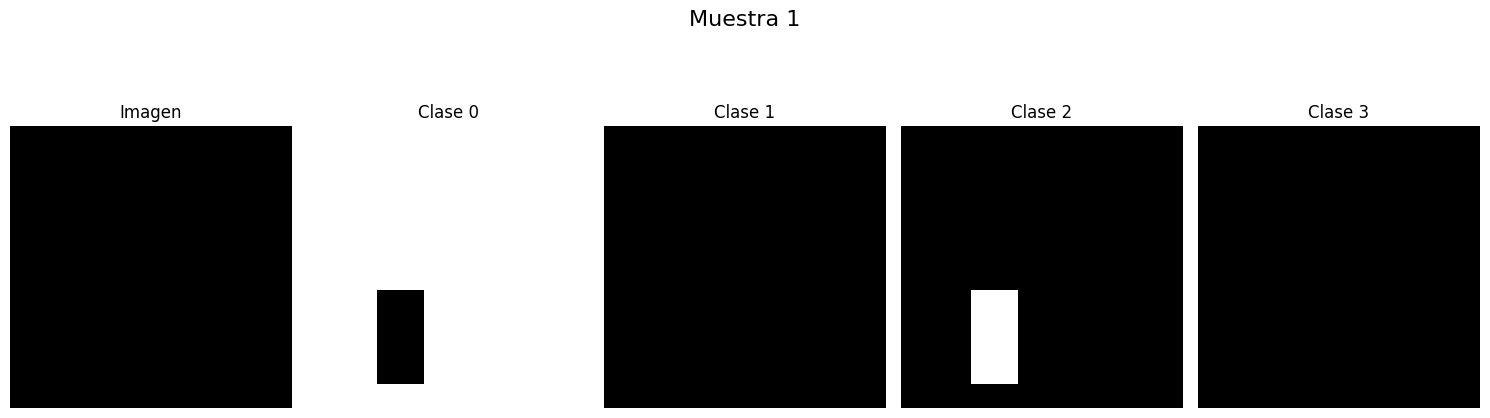

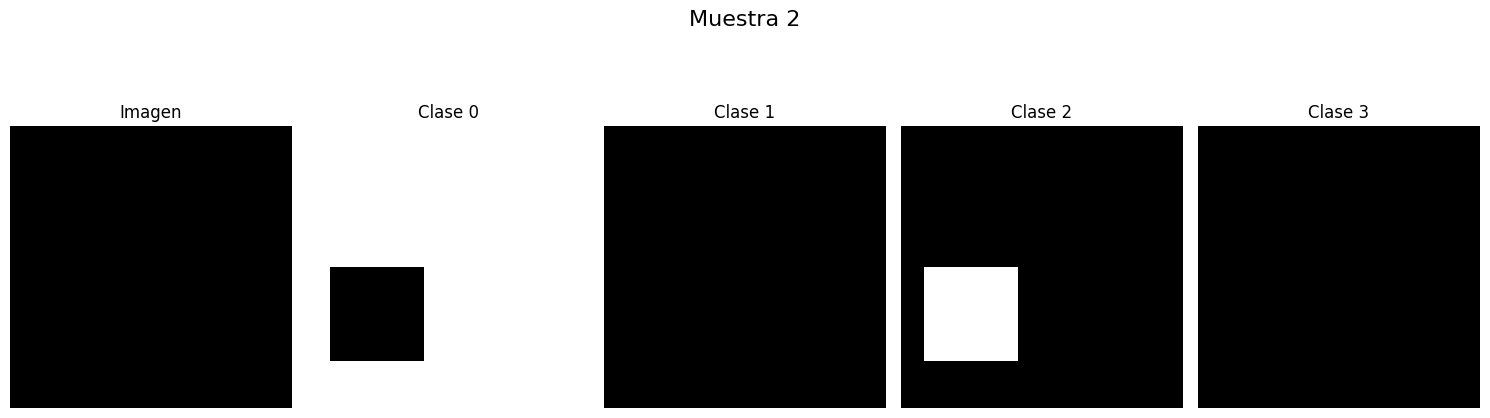

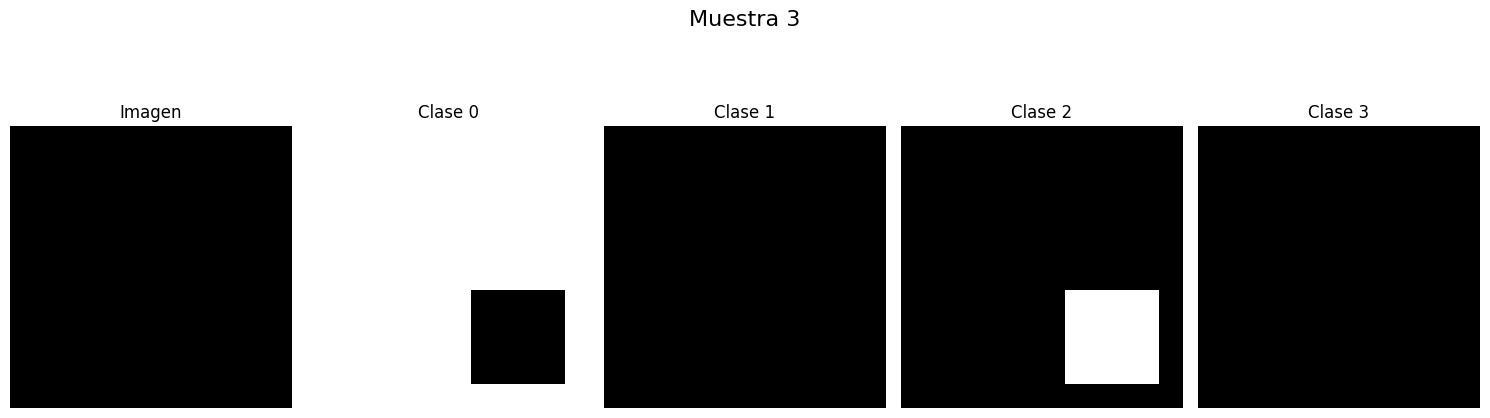

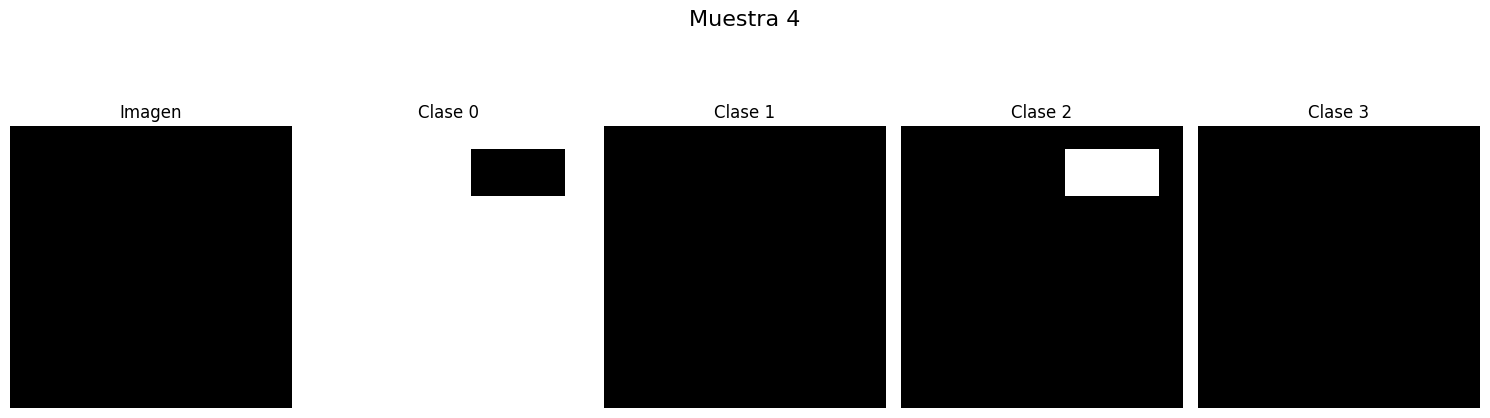

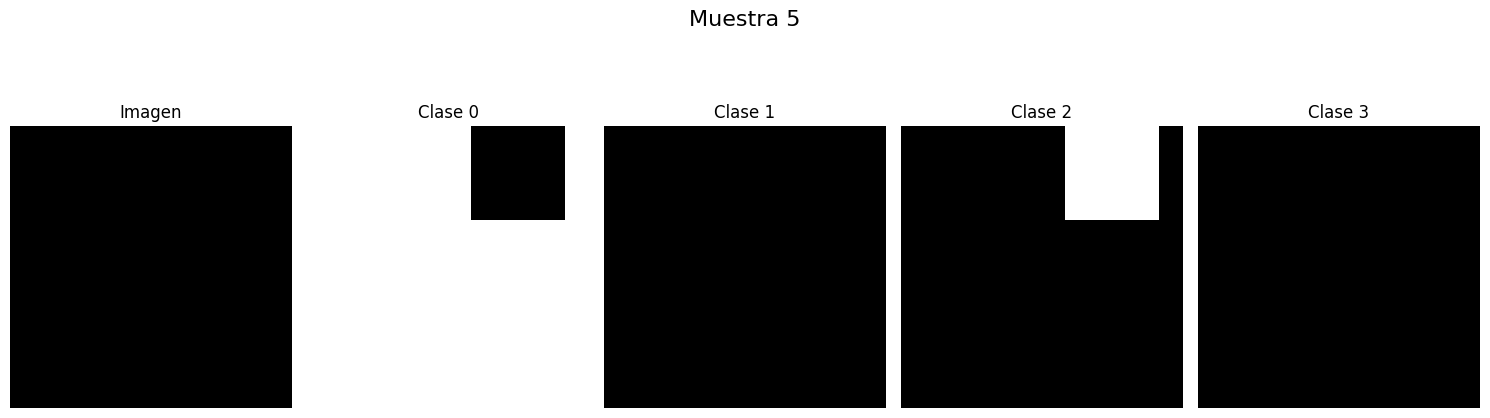

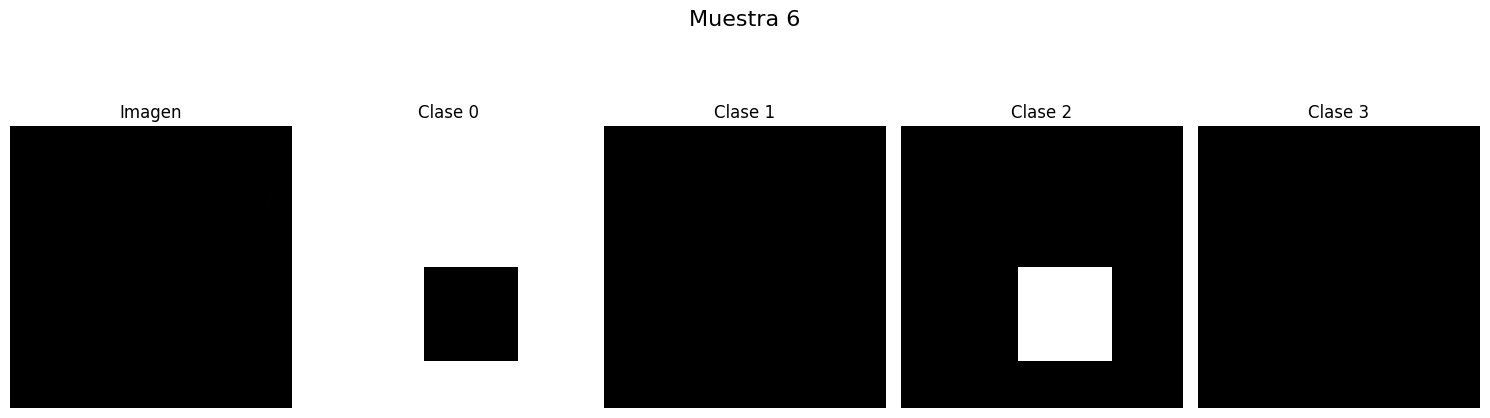

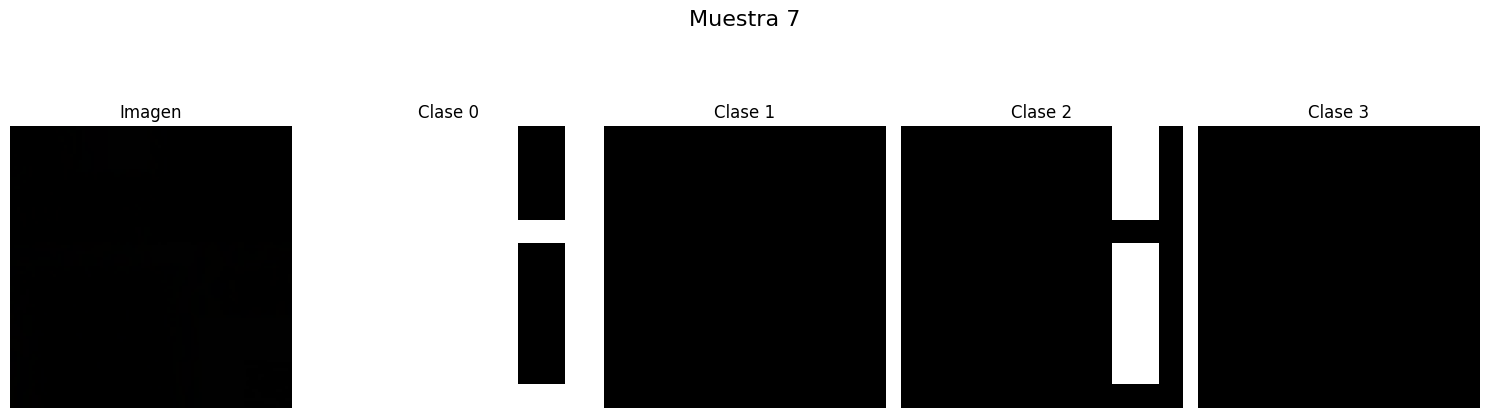

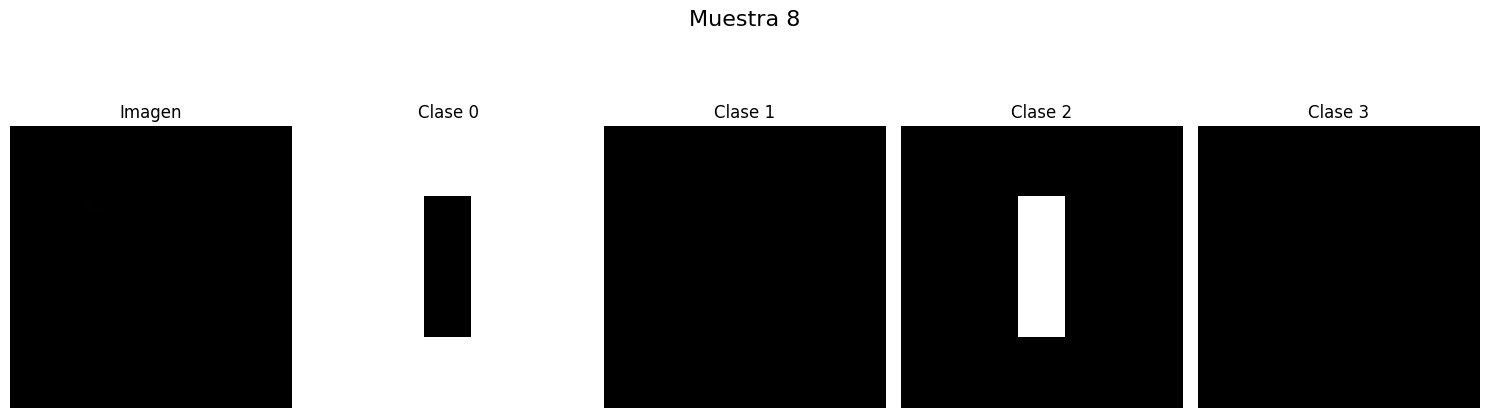

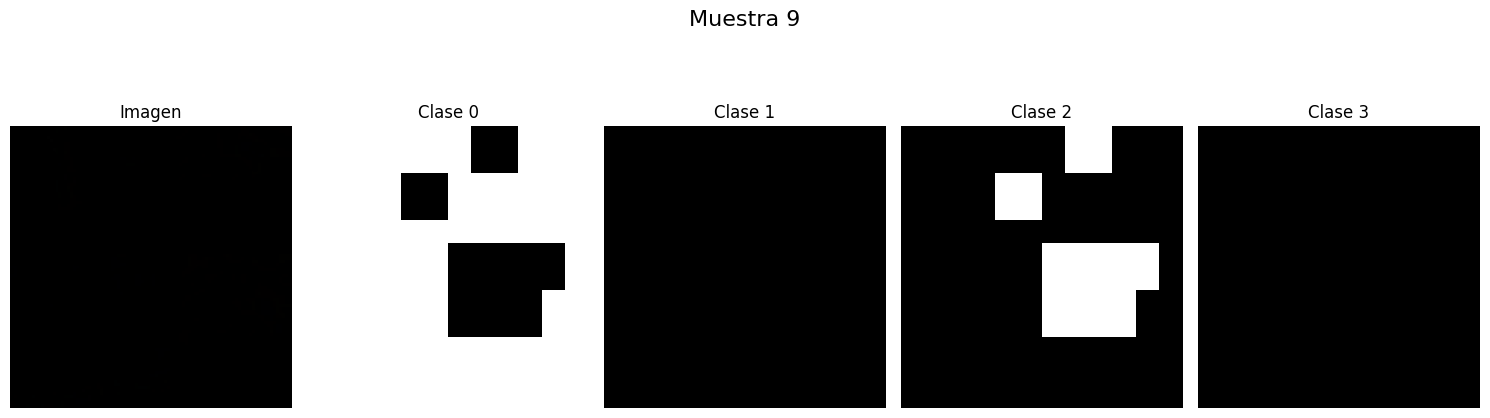

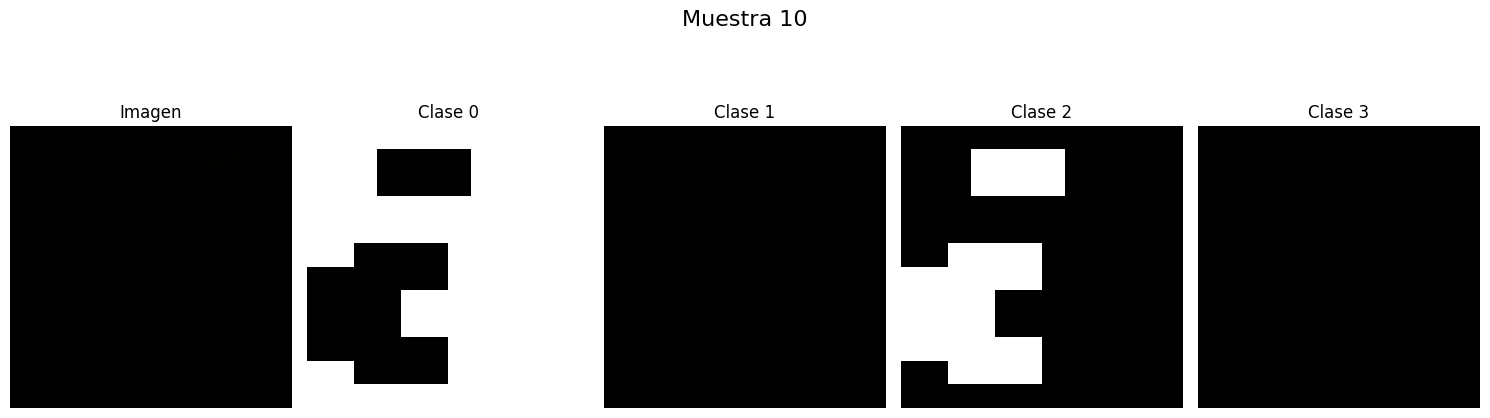

In [22]:
import matplotlib.pyplot as plt

def plot_samples(X_train, Y_train, num_samples=10):
    """
    Plotea las primeras imágenes de X_train y sus correspondientes mapas de segmentación en Y_train.
    Cada mapa de segmentación se plotea como 4 imágenes, una por canal (clase).

    Args:
        X_train (np.ndarray): Conjunto de imágenes de entrada.
        Y_train (np.ndarray): Conjunto de mapas de segmentación.
        num_samples (int): Número de muestras a mostrar.
    """
    for i in range(num_samples):
        fig, axes = plt.subplots(1, 5, figsize=(15, 5))
        fig.suptitle(f"Muestra {i + 1}", fontsize=16)

        # Mostrar imagen original
        axes[0].imshow(X_train[i].astype(np.uint8))
        axes[0].set_title("Imagen")
        axes[0].axis("off")

        # Mostrar canales del mapa de segmentación
        for c in range(4):  # 4 clases incluyendo fondo
            axes[c + 1].imshow(Y_train[i, :, :, c], cmap='gray')
            axes[c + 1].set_title(f"Clase {c}")
            axes[c + 1].axis("off")

        plt.tight_layout()
        plt.show()

# Llamar a la función para plotear las primeras 10 muestras
plot_samples(X_train, Y_train, num_samples=10)

In [83]:
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import BatchNormalization, Conv2D, Softmax, Input
from tensorflow.keras.models import Model

def build_model(input_shape, num_classes, alpha=0.35):
    """
    Construye un modelo de detección inspirado en MobileNetV2 con cabeza personalizada.

    Args:
        input_shape (tuple): Tamaño de entrada del modelo (altura, ancho, canales).
        num_classes (int): Número de clases, incluyendo el fondo.
        alpha (float): Valor de alpha para MobileNetV2.

    Returns:
        tf.keras.Model: Modelo Keras sin compilar.
    """
    # Crear la base MobileNetV2
    base_model = MobileNetV2(
        input_shape=input_shape,
        weights=None,  # Puedes usar "imagenet" si quieres inicializar con pesos preentrenados
        alpha=alpha,
        include_top=True
    )

    # Ajustar momentum de BatchNormalization para redes más rápidas
    for layer in base_model.layers:
        if isinstance(layer, BatchNormalization):
            layer.momentum = 0.9

    # Capa de salida de la base
    cut_point = base_model.get_layer('block_6_expand_relu').output

    # Cabeza personalizada
    x = Conv2D(32, (1, 1), activation='relu', name='head')(cut_point)
    logits = Conv2D(num_classes, (1, 1), activation=None, name='logits')(x)
    outputs = Softmax(name='softmax')(logits)

    return Model(inputs=base_model.input, outputs=outputs)

# Parámetros
input_shape = (96, 96, 3)
num_classes = 4  # Incluye fondo
model = build_model(input_shape=input_shape, num_classes=num_classes)

# Compilar el modelo
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()

Model: "model_5"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_6 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 16)   432         ['input_6[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 16)   64          ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 16)   0           ['bn_Conv1[0][0]']               
                                                                                            

In [88]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Parámetros de entrenamiento
batch_size = 32
epochs = 20
learning_rate = 0.00001

# Crear el modelo
input_shape = (96, 96, 3)
num_classes = 4
model = build_model(input_shape=input_shape, num_classes=num_classes)

# Compilar el modelo
loss_fn = tf.keras.losses.CategoricalCrossentropy(from_logits=False)
optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss=loss_fn, metrics=['accuracy'])

# Callbacks
checkpoint_callback = ModelCheckpoint(
    filepath='best_model2.h5', 
    monitor='val_loss', 
    save_best_only=True,
    verbose=1
)
early_stopping_callback = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=False,
    verbose=1
)

# Crear datasets de entrenamiento y validación
split_index = int(0.8 * len(X_train))
X_train_split, X_val_split = X_train[:split_index], X_train[split_index:]
Y_train_split, Y_val_split = Y_train[:split_index], Y_train[split_index:]

train_dataset = tf.data.Dataset.from_tensor_slices((X_train_split, Y_train_split))
train_dataset = train_dataset.shuffle(buffer_size=1000).batch(batch_size).prefetch(tf.data.AUTOTUNE)

val_dataset = tf.data.Dataset.from_tensor_slices((X_val_split, Y_val_split))
val_dataset = val_dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Entrenar el modelo
history = model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=epochs,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=1
)

# Guardar el modelo final
model.save("final_model2.h5")

Epoch 1/20
89/90 [============================>.] - ETA: 0s - loss: 1.4727 - accuracy: 0.0991
Epoch 1: val_loss improved from inf to 1.40597, saving model to best_model2.h5
90/90 [==============================] - 8s 46ms/step - loss: 1.4722 - accuracy: 0.0993 - val_loss: 1.4060 - val_accuracy: 0.1223
Epoch 2/20
90/90 [==============================] - ETA: 0s - loss: 1.3637 - accuracy: 0.1447
Epoch 2: val_loss improved from 1.40597 to 1.33428, saving model to best_model2.h5
90/90 [==============================] - 3s 36ms/step - loss: 1.3637 - accuracy: 0.1447 - val_loss: 1.3343 - val_accuracy: 0.1664
Epoch 3/20
89/90 [============================>.] - ETA: 0s - loss: 1.2650 - accuracy: 0.2084
Epoch 3: val_loss improved from 1.33428 to 1.26667, saving model to best_model2.h5
90/90 [==============================] - 3s 35ms/step - loss: 1.2646 - accuracy: 0.2086 - val_loss: 1.2667 - val_accuracy: 0.2307
Epoch 4/20
89/90 [============================>.] - ETA: 0s - loss: 1.1761 - accura

In [30]:
import edgeimpulse as ei
ei.API_KEY = "ei_54db4850585c016105f49b5c95a99f83b0991b33e965335b2826d5fd309c8b2e" # Change to your key

In [31]:
profile = ei.model.profile(model=model, device='arduino-nicla-vision')
print(profile.summary())

INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpnm7mseyi\saved_model\assets


INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpnm7mseyi\saved_model\assets


Target results for float32:
{
    "device": "arduino-nicla-vision",
    "tfliteFileSizeBytes": 85552,
    "isSupportedOnMcu": true,
    "memory": {
        "tflite": {
            "ram": 1094057,
            "rom": 142928,
            "arenaSize": 1093753
        },
        "eon": {
            "ram": 908400,
            "rom": 106168,
            "arenaSize": 905440
        },
        "eonRamOptimized": {
            "ram": 445648,
            "rom": 117432,
            "arenaSize": 440160
        }
    },
    "timePerInferenceMs": 117
}


Performance on device types:
{
    "variant": "float32",
    "lowEndMcu": {
        "description": "Estimate for a Cortex-M0+ or similar, running at 40MHz",
        "timePerInferenceMs": 18045,
        "memory": {
            "tflite": {
                "ram": 1094019,
                "rom": 125616
            },
            "eon": {
                "ram": 908224,
                "rom": 99704
            },
            "eonRamOptimized": {
         

In [49]:
ei.model.deploy(model=model,
                model_input_type=ei.model.input_type.OtherInput(),
                model_output_type=ei.model.output_type.ObjectDetection(
                    labels=["background","0", "1", "2"],          # Etiquetas de las clases
                    last_layer="fomo",            # Tipo de capa de salida
                    minimum_confidence=0.4,
                ),
                output_directory=".")

TypeError: __init__() got an unexpected keyword argument 'deploy_model_type'

In [45]:
help(ei.model.deploy)

Help on function deploy in module edgeimpulse.model._functions.deploy:

deploy(model: Union[pathlib.Path, str, bytes, Any], model_output_type: Union[edgeimpulse.model.output_type.Classification, edgeimpulse.model.output_type.Regression, edgeimpulse.model.output_type.ObjectDetection], model_input_type: Union[edgeimpulse.model.input_type.ImageInput, edgeimpulse.model.input_type.AudioInput, edgeimpulse.model.input_type.TimeSeriesInput, edgeimpulse.model.input_type.OtherInput, NoneType] = None, representative_data_for_quantization: Union[pathlib.Path, str, bytes, Any, NoneType] = None, deploy_model_type: Optional[str] = None, engine: str = 'tflite', deploy_target: str = 'zip', output_directory: Optional[str] = None, api_key: Optional[str] = None, timeout_sec: Optional[float] = None) -> _io.BytesIO
    Transform a machine learning model into a library for an edge device.
    
    Transforms a trained model into a library, package, or firmware ready to deploy on an embedded
    device. Can o

In [47]:
ei.model.list_deployment_targets()

['zip',
 'arduino',
 'cubemx',
 'wasm',
 'wasm-browser-simd',
 'wasm-node-simd',
 'tensorrt',
 'ethos-alif-ensemble-e7-hp',
 'ethos-alif-ensemble-e7-he',
 'ethos-nxp-imx93',
 'ethos-alif-ensemble-e7-he-cmsis-pack',
 'ethos-alif-ensemble-e7-hp-cmsis-pack',
 'ethos-himax-wiseeye2',
 'synaptics-tensaiflow-lib',
 'meta-tf',
 'memryx-dfp',
 'tidl-lib-am62a',
 'tidl-lib-am68a',
 'slcc',
 'arduino-nano-33-ble-sense',
 'arduino-nicla-vision',
 'runner-linux-aarch64-advantech-icam540',
 'espressif-esp32',
 'silabs-xg24',
 'sony-spresense-commonsense',
 'alif-ensemble-e7',
 'alif-ensemble-e7-he',
 'alif-ensemble-e7-hp-sram',
 'runner-linux-aarch64',
 'runner-linux-armv7',
 'runner-linux-x86_64',
 'runner-linux-aarch64-akd1000',
 'runner-linux-x86_64-akd1000',
 'runner-mac-x86_64',
 'runner-linux-aarch64-tda4vm',
 'runner-linux-aarch64-am62a',
 'iar',
 'runner-linux-aarch64-am68a',
 'cmsis-package',
 'runner-linux-aarch64-jetson-nano',
 'runner-linux-aarch64-rzg2l',
 'runner-linux-aarch64-jetson-

In [42]:
help(ei.model.output_type.ObjectDetection)


Help on class ObjectDetection in module edgeimpulse.model.output_type:

class ObjectDetection(builtins.dict)
 |  ObjectDetection(labels: List[str], last_layer: Union[Literal['mobilenet-ssd', 'fomo', 'yolov5', 'yolo5v5-drpai', 'yolox', 'yolov7'], str], minimum_confidence: float)
 |  
 |  Method resolution order:
 |      ObjectDetection
 |      builtins.dict
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, labels: List[str], last_layer: Union[Literal['mobilenet-ssd', 'fomo', 'yolov5', 'yolo5v5-drpai', 'yolox', 'yolov7'], str], minimum_confidence: float)
 |      Describe an object detection output with a specific format and labels.
 |      
 |      Args:
 |          labels (Optional[List[str]]): A list of label names, one per index in the
 |              output tensor. If no list is provided then numeric labels will be
 |              assigned according to the order of outputs.
 |          last_layer (Union[Literal, str]): The output type of the model, depend

In [52]:
import tensorflow as tf
import numpy as np

# Ruta al modelo original (en formato SavedModel o .h5)
model_path = "best_model.h5"  # Cambia esto por la ruta correcta

# Cargar el modelo en TensorFlow
model = tf.keras.models.load_model(model_path)

# Ruta de salida del modelo convertido
output_path = "modelo_cuantizado_int8.tflite"

# Función de representación para datos (debe devolver un lote con las dimensiones correctas)
# Cambia esto según tu conjunto de datos
def representative_dataset_generator():
    for input_data in X_train[:100]:  # Usa las primeras 100 muestras de X_train (puedes ajustar)
        input_data = input_data[np.newaxis, ...]  # Añade la dimensión de lote
        yield [input_data]

# Convertir el modelo a TFLite con cuantización de int8
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # Activar optimizaciones
converter.representative_dataset = representative_dataset_generator  # Cuantización int8
converter.target_spec.supported_ops = [tf.lite.OpsSet.TFLITE_BUILTINS_INT8]  # Solo ops int8
converter.inference_input_type = tf.uint8  # Tipo de entrada para el modelo convertido
converter.inference_output_type = tf.uint8  # Tipo de salida para el modelo convertido

# Convertir el modelo
tflite_model = converter.convert()

# Guardar el modelo en un archivo .tflite
with open(output_path, "wb") as f:
    f.write(tflite_model)

print(f"Modelo cuantizado guardado en {output_path}")

INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpldc297pq\assets


INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpldc297pq\assets
D:\anaconda\envs\tf\lib\site-packages\tensorflow\lite\python\convert.py:766: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


Modelo cuantizado guardado en modelo_cuantizado_int8.tflite


In [55]:
import numpy as np
import tensorflow as tf

# Cargar el modelo TFLite
interpreter = tf.lite.Interpreter(model_path="trained.tflite")
interpreter.allocate_tensors()

# Obtener detalles de entrada y salida
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Asegúrate de que los datos estén en el formato esperado (por ejemplo, uint8)
input_shape = input_details[0]['shape']

# Evaluar el modelo
correct_predictions = 0
total_predictions = 0

for i, (input_data, true_label) in enumerate(zip(X_val_split, Y_val_split)):
    # Preprocesar el dato de entrada (si es necesario)
    input_data = np.expand_dims(input_data, axis=0)  # Añadir dimensión de lote
    if input_details[0]['dtype'] == np.uint8:
        input_data = (input_data * 255).astype(np.uint8)  # Escalar si es uint8

    # Pasar el dato al intérprete
    interpreter.set_tensor(input_details[0]['index'], input_data)
    interpreter.invoke()

    # Obtener la predicción
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_label = np.argmax(output_data)  # Asumiendo que es un modelo de clasificación

    # Asegúrate de que true_label sea un solo valor
    if isinstance(true_label, np.ndarray):
        true_label = np.argmax(true_label)  # Si es un vector (one-hot), obtiene la etiqueta de clase

    # Comparar con la etiqueta verdadera
    if predicted_label == true_label:
        correct_predictions += 1
    total_predictions += 1

# Calcular la precisión
accuracy = correct_predictions / total_predictions
print(f"Accuracy del modelo cuantizado: {accuracy:.2%}")

Accuracy del modelo cuantizado: 0.14%


In [63]:
import tensorflow as tf

# Ruta de tu modelo entrenado
model = tf.keras.models.load_model('best_model.h5')

# Convertir el modelo a formato TFLite con cuantización de 16 bits (float16)
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Activar la cuantización de 16 bits para inferencia
converter.optimizations = [tf.lite.Optimize.DEFAULT]
converter.target_spec.supported_types = [tf.float16]

# Convertir el modelo
tflite_model = converter.convert()

# Guardar el modelo convertido en un archivo .tflite
output_path = 'modelo_cuantizado_16bits.tflite'
with open(output_path, 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpuzgt_xn_\assets


INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpuzgt_xn_\assets


In [64]:
import tensorflow as tf
import numpy as np

# Cargar el modelo TFLite cuantizado
interpreter = tf.lite.Interpreter(model_path="modelo_cuantizado_16bits.tflite")

# Cargar el modelo de prueba y obtener los datos de entrada (X_test) y las etiquetas (y_test)
# Asegúrate de tener tus datos de prueba listos
# X_test: tus datos de entrada de prueba
# y_test: las etiquetas verdaderas de prueba

# Asumimos que X_test está preprocesado adecuadamente
# Convertir X_test a float32 si es necesario, ya que TensorFlow Lite espera que los datos de entrada sean float32
X_val_split1 = np.array(X_val_split, dtype=np.float32)  # Asegúrate de que estén en el formato adecuado

# Prepara el interpreter
interpreter.allocate_tensors()

# Obtener índices de entrada y salida
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Inicializar variables para calcular el accuracy
correct_predictions = 0
total_predictions = 0

# Realizar inferencias sobre el conjunto de datos de prueba
for i in range(len(X_val_split1)):
    # Preprocesar la entrada para ajustarse al formato requerido por el modelo
    input_data = np.expand_dims(X_val_split1[i], axis=0).astype(np.float32)  # Agregar la dimensión de batch
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Realizar la inferencia
    interpreter.invoke()

    # Obtener la salida
    output_data = interpreter.get_tensor(output_details[0]['index'])

    # Obtener la etiqueta predicha
    predicted_label = np.argmax(output_data)  # Asumiendo que es un modelo de clasificación

    # Si las etiquetas están en formato one-hot, obtenemos la clase verdadera usando np.argmax
    true_label = np.argmax(Y_val_split[i])  # La etiqueta verdadera en formato escalar

    # Comparar con la etiqueta verdadera
    if predicted_label == true_label:
        correct_predictions += 1
    total_predictions += 1

# Calcular el accuracy
accuracy = correct_predictions / total_predictions * 100
print(f"Accuracy del modelo cuantizado: {accuracy:.2f}%")

Accuracy del modelo cuantizado: 0.14%


In [61]:
import tensorflow as tf

# Cargar el modelo de Keras o TensorFlow
model = tf.keras.models.load_model('best_model.h5')  # Reemplaza con la ruta a tu modelo Keras

# Crear el convertidor TFLite
converter = tf.lite.TFLiteConverter.from_keras_model(model)

# Convertir el modelo a TFLite sin cuantización
tflite_model = converter.convert()

# Guardar el modelo TFLite en un archivo
with open('modelo_sin_cuantizacion.tflite', 'wb') as f:
    f.write(tflite_model)

print("El modelo fue convertido y guardado correctamente.")

INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpoc011a6g\assets


INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmpoc011a6g\assets


El modelo fue convertido y guardado correctamente.


In [65]:
import tensorflow as tf
import numpy as np

# Cargar el modelo TFLite
interpreter = tf.lite.Interpreter(model_path="modelo_sin_cuantizacion.tflite")

# Cargar las funciones necesarias del intérprete
interpreter.allocate_tensors()

# Obtener los detalles de las tensores de entrada y salida
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Asumir que ya tienes X_val (las características de validación) y Y_val (las etiquetas verdaderas)
# Si tienes datos en X_val que no están normalizados, normalízalos como lo hiciste con el modelo original

# Inicializar el contador de aciertos
correct_predictions = 0
total_predictions = 0

# Evaluar el modelo con un conjunto de datos (en este caso, X_val y Y_val)
for i in range(len(X_val_split)):
    # Preparar los datos de entrada para el intérprete
    input_data = np.expand_dims(X_val_split[i], axis=0).astype(np.float32)
    interpreter.set_tensor(input_details[0]['index'], input_data)
    
    # Realizar la inferencia
    interpreter.invoke()
    
    # Obtener las predicciones del modelo
    output_data = interpreter.get_tensor(output_details[0]['index'])
    
    # Obtener la etiqueta predicha (usualmente el índice con la mayor probabilidad)
    predicted_label = np.argmax(output_data)
    
    # Obtener la etiqueta verdadera
    true_label = np.argmax(Y_val_split[i])  # Asumiendo que Y_val es one-hot encoded
    
    # Comparar las predicciones con las etiquetas verdaderas
    if predicted_label == true_label:
        correct_predictions += 1
    total_predictions += 1

# Calcular la precisión
accuracy = (correct_predictions / total_predictions) * 100
print(f'Accuracy del modelo TFLite: {accuracy:.2f}%')

Accuracy del modelo TFLite: 0.14%


In [72]:
from tensorflow.keras.models import load_model
import numpy as np

# Cargar el modelo .h5
model = load_model('best_model.h5')

# Preprocesar los datos de entrada (asegúrate de que coincida con el preprocesamiento usado durante el entrenamiento)
X_val_normalized = X_val_split.astype(np.float32) / 255.0  # Ejemplo de normalización para imágenes

# Evaluar el accuracy
loss, accuracy = model.evaluate(X_val_normalized, Y_val_split)
print(f'Accuracy del modelo .h5: {accuracy:.2f}')

23/23 [==============================] - 1s 18ms/step - loss: 0.8527 - accuracy: 0.7424
Accuracy del modelo .h5: 0.74


In [75]:
import tensorflow as tf
import numpy as np

# Cargar el modelo TFLite
interpreter = tf.lite.Interpreter(model_path="modelo_sin_cuantizacion.tflite")
interpreter.allocate_tensors()

# Obtener detalles de las tensores
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocesar los datos (esto debe coincidir con el preprocesamiento usado en el modelo original)
X_val_normalized = X_val_split.astype(np.float32) / 255.0  # Normalización, si es necesario

correct_predictions = 0
total_predictions = 0

# Realizar las predicciones
for i in range(len(X_val_split)):
    input_data = np.expand_dims(X_val_split[i], axis=0)  # Expande la dimensión para el batch
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Inferir
    interpreter.invoke()

    # Obtener las predicciones
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_label = np.argmax(output_data)

    true_label = np.argmax(Y_val_split[i])  # Si las etiquetas son one-hot encoded

    if predicted_label == true_label:
        correct_predictions += 1
    total_predictions += 1

# Calcular el accuracy
accuracy = (correct_predictions / total_predictions) * 100
print(f'Accuracy del modelo TFLite: {accuracy:.2f}%')

Accuracy del modelo TFLite: 0.14%


In [80]:
import tensorflow as tf

# Cargar el modelo Keras (.h5)
model = tf.keras.models.load_model('best_model.h5')

# Convertir el modelo a TFLite sin optimización
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = []  # Sin optimización para evitar cambios en el modelo
tflite_model = converter.convert()

# Guardar el modelo TFLite
with open('modelo_sin_optimizacion.tflite', 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmptzyhjxp4\assets


INFO:tensorflow:Assets written to: C:\Users\gianf\AppData\Local\Temp\tmptzyhjxp4\assets


In [82]:
import numpy as np
import tensorflow as tf

# Cargar el modelo TFLite
interpreter = tf.lite.Interpreter(model_path="modelo_sin_optimizacion.tflite")
interpreter.allocate_tensors()

# Obtener detalles de los tensores
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Preprocesar la entrada (asegúrate de que esto sea lo mismo que se usó en el entrenamiento)
X_val_normalized = X_val_split

# Realizar las predicciones
correct_predictions = 0
total_predictions = 0

for i in range(len(X_val_split)):
    input_data = np.expand_dims(X_val_normalized[i], axis=0)  # Expande la dimensión para el batch
    interpreter.set_tensor(input_details[0]['index'], input_data)

    # Inferir
    interpreter.invoke()

    # Obtener las predicciones
    output_data = interpreter.get_tensor(output_details[0]['index'])
    predicted_label = np.argmax(output_data)

    true_label = np.argmax(Y_val_split[i])  # Si las etiquetas son one-hot encoded

    if predicted_label == true_label:
        correct_predictions += 1
    total_predictions += 1

accuracy = (correct_predictions / total_predictions) * 100
print(f'Accuracy del modelo TFLite: {accuracy:.2f}%')

Accuracy del modelo TFLite: 0.14%
